<a href="https://colab.research.google.com/github/SalmanAlfarizy26/project/blob/main/histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving latihan.png to latihan (1).png


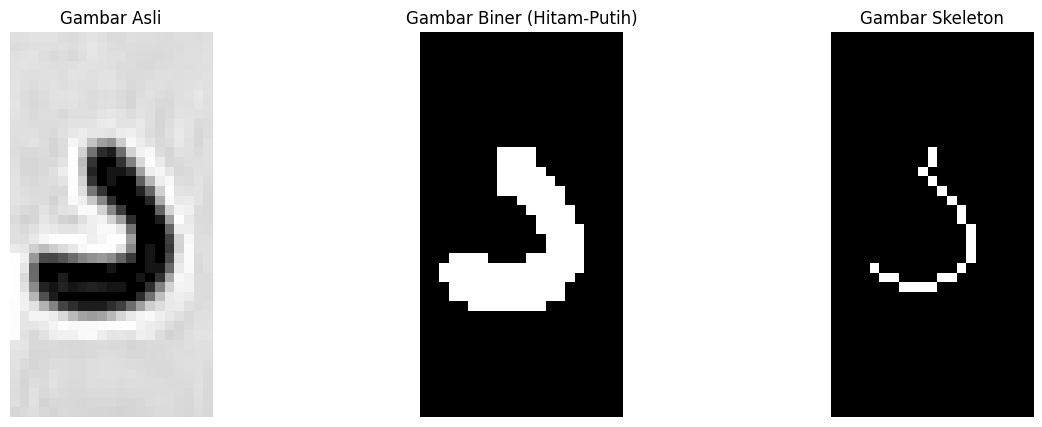

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

image_path = "latihan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# === 2. Lakukan Binarisasi (ubah ke hitam-putih) ===
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)  # 128 adalah nilai threshold

# === 3. Skeletonization ===
skeleton = skeletonize(binary > 0)  # Skeletonisasi menggunakan nilai boolean
skeleton = (skeleton * 255).astype(np.uint8)  # Ubah kembali ke skala 0-255

# === 4. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 3, 2)
plt.imshow(binary, cmap="gray")
plt.title("Gambar Biner (Hitam-Putih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 3, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()


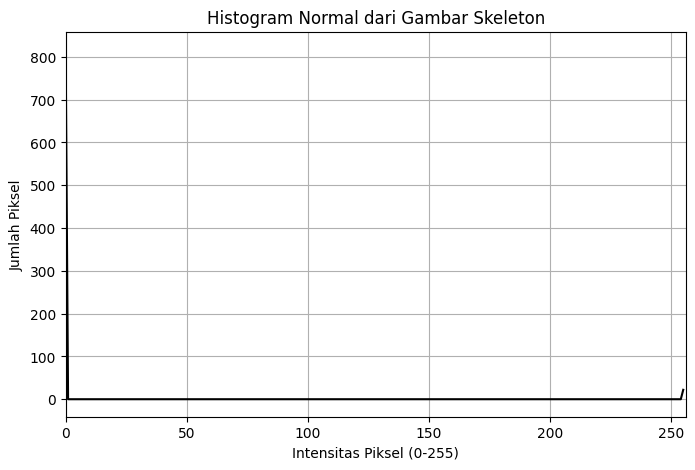

In [ ]:
# === 5. Hitung Histogram Normal ===
hist = cv2.calcHist([skeleton], [0], None, [256], [0, 256])  # Hitung histogram dari gambar skeleton

# === 6. Tampilkan Histogram ===
plt.figure(figsize=(8, 5))
plt.plot(hist, color='black')  # Plot histogram dengan warna hitam
plt.title("Histogram Normal dari Gambar Skeleton")
plt.xlabel("Intensitas Piksel (0-255)")
plt.ylabel("Jumlah Piksel")
plt.xlim([0, 256])  # Batasi sumbu X dari 0 hingga 255
plt.grid()

plt.show()


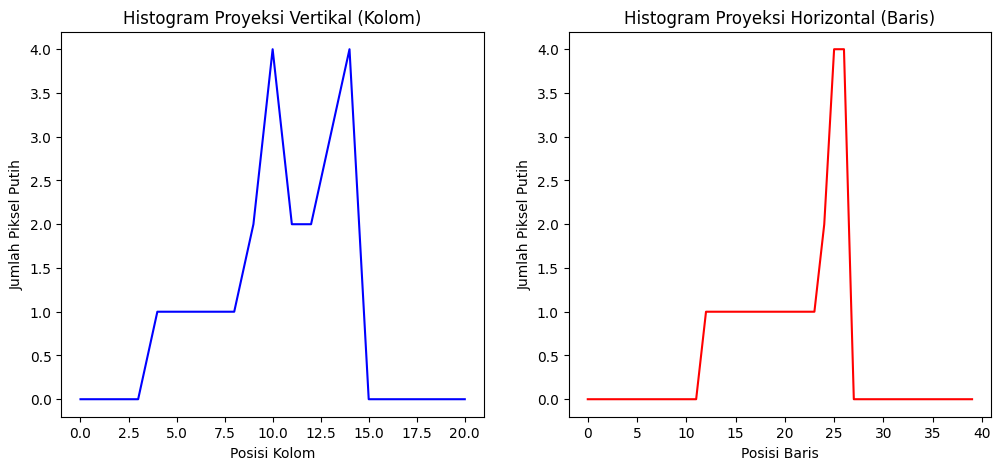

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# === 1. Baca Gambar ===
image_path = "latihan.png"  # Sesuaikan dengan gambar yang ingin diproses
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Lakukan Binarisasi ===
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# === 3. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 4. Hitung Histogram Proyeksi ===
hist_col = np.sum(skeleton == 255, axis=0)  # Piksel putih di setiap kolom
hist_row = np.sum(skeleton == 255, axis=1)  # Piksel putih di setiap baris

# === 5. Tampilkan Histogram Proyeksi ===
plt.figure(figsize=(12, 5))

# Histogram Vertikal (Kolom)
plt.subplot(1, 2, 1)
plt.plot(hist_col, color='blue')
plt.title("Histogram Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Histogram Horizontal (Baris)
plt.subplot(1, 2, 2)
plt.plot(hist_row, color='red')
plt.title("Histogram Proyeksi Horizontal (Baris)")
plt.xlabel("Posisi Baris")
plt.ylabel("Jumlah Piksel Putih")

plt.show()


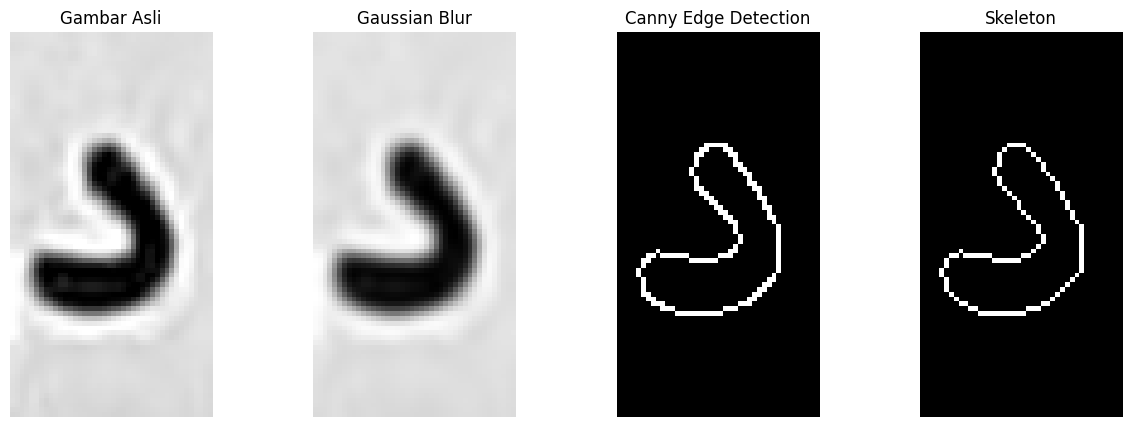

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# === 1. Load Gambar ===
image_path = "latihan.png"  # Sesuaikan dengan path gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Perbaikan Ketajaman dengan Preprocessing ===
# Gunakan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Gunakan Canny Edge Detection untuk mendeteksi tepi huruf
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# === 4. Konversi ke Biner ===
_, binary = cv2.threshold(edges, 128, 255, cv2.THRESH_BINARY)

# === 5. Skeletonization ===
skeleton = skeletonize(binary > 0)  # Konversi ke boolean
skeleton = (skeleton * 255).astype(np.uint8)  # Ubah kembali ke 0-255

# === 6. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.show()


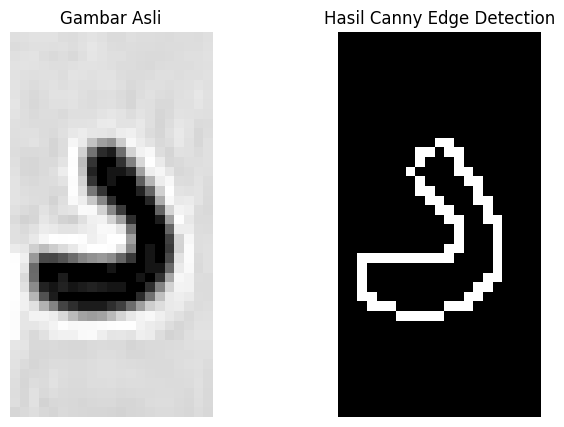

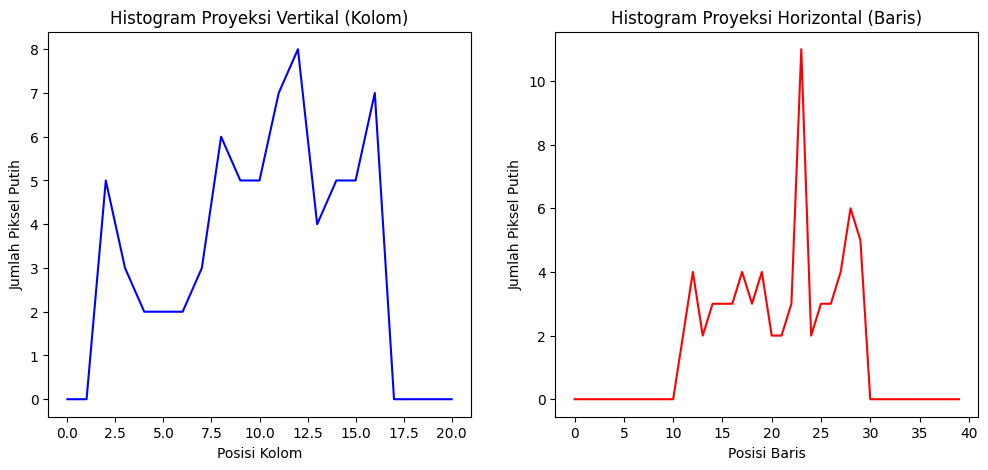

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load Image ===
image_path = "latihan.png"  # Ganti dengan path gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Pastikan gambar berhasil dimuat
if image is None:
    raise ValueError("Gambar tidak ditemukan! Pastikan path benar.")

# === 2. Canny Edge Detection ===
edges = cv2.Canny(image, 100, 200)  # Deteksi tepi

# === 3. Hitung Histogram Proyeksi ===
hist_col = np.sum(edges == 255, axis=0)  # Hitung piksel putih per kolom
hist_row = np.sum(edges == 255, axis=1)  # Hitung piksel putih per baris

# === 4. Tampilkan Gambar Hasil Canny Edge ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Hasil Canny Edge Detection")
plt.axis("off")

# === 5. Tampilkan Histogram Proyeksi ===
plt.figure(figsize=(12, 5))

# Histogram Proyeksi Vertikal (Kolom)
plt.subplot(1, 2, 1)
plt.plot(hist_col, color='blue')
plt.title("Histogram Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Histogram Proyeksi Horizontal (Baris)
plt.subplot(1, 2, 2)
plt.plot(hist_row, color='red')
plt.title("Histogram Proyeksi Horizontal (Baris)")
plt.xlabel("Posisi Baris")
plt.ylabel("Jumlah Piksel Putih")

plt.show()


Saving percobaan.png to percobaan.png


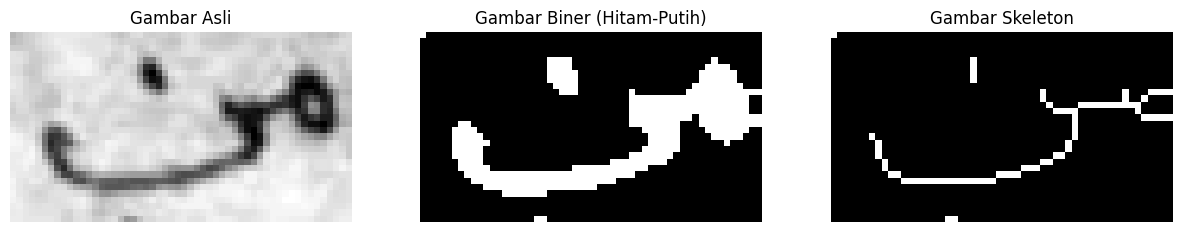

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# === 2. Lakukan Binarisasi (ubah ke hitam-putih) ===
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)  # 128 adalah nilai threshold

# === 3. Skeletonization ===
skeleton = skeletonize(binary > 0)  # Skeletonisasi menggunakan nilai boolean
skeleton = (skeleton * 255).astype(np.uint8)  # Ubah kembali ke skala 0-255

# === 4. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 3, 2)
plt.imshow(binary, cmap="gray")
plt.title("Gambar Biner (Hitam-Putih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 3, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()

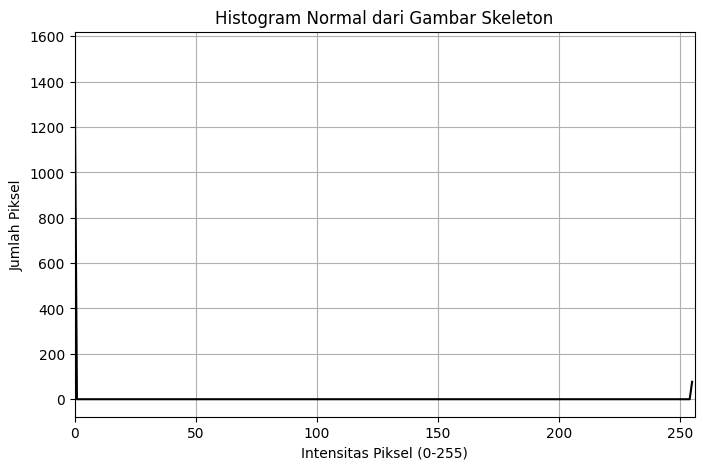

In [ ]:
# === 5. Hitung Histogram Normal ===
hist = cv2.calcHist([skeleton], [0], None, [256], [0, 256])  # Hitung histogram dari gambar skeleton

# === 6. Tampilkan Histogram ===
plt.figure(figsize=(8, 5))
plt.plot(hist, color='black')  # Plot histogram dengan warna hitam
plt.title("Histogram Normal dari Gambar Skeleton")
plt.xlabel("Intensitas Piksel (0-255)")
plt.ylabel("Jumlah Piksel")
plt.xlim([0, 256])  # Batasi sumbu X dari 0 hingga 255
plt.grid()

plt.show()


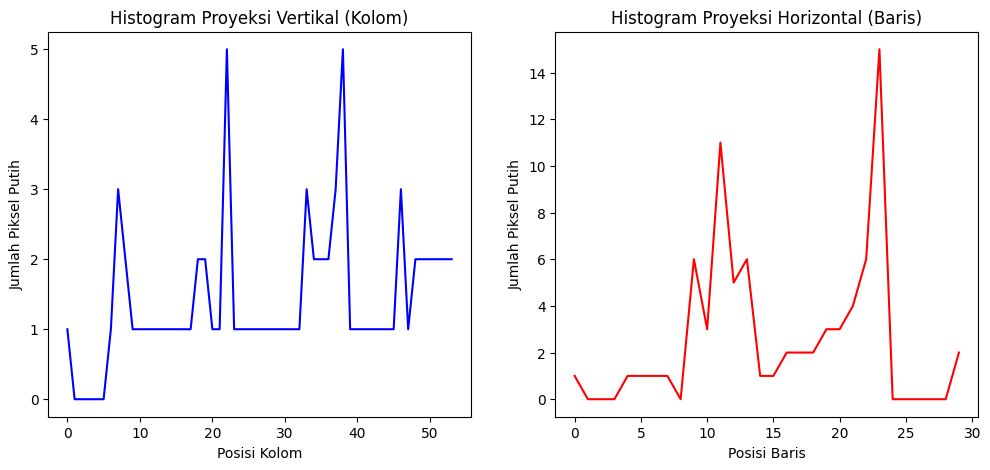

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# === 1. Baca Gambar ===
image_path = "percobaan.png"  # Sesuaikan dengan gambar yang ingin diproses
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Lakukan Binarisasi ===
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# === 3. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 4. Hitung Histogram Proyeksi ===
hist_col = np.sum(skeleton == 255, axis=0)  # Piksel putih di setiap kolom
hist_row = np.sum(skeleton == 255, axis=1)  # Piksel putih di setiap baris

# === 5. Tampilkan Histogram Proyeksi ===
plt.figure(figsize=(12, 5))

# Histogram Vertikal (Kolom)
plt.subplot(1, 2, 1)
plt.plot(hist_col, color='blue')
plt.title("Histogram Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Histogram Horizontal (Baris)
plt.subplot(1, 2, 2)
plt.plot(hist_row, color='red')
plt.title("Histogram Proyeksi Horizontal (Baris)")
plt.xlabel("Posisi Baris")
plt.ylabel("Jumlah Piksel Putih")

plt.show()


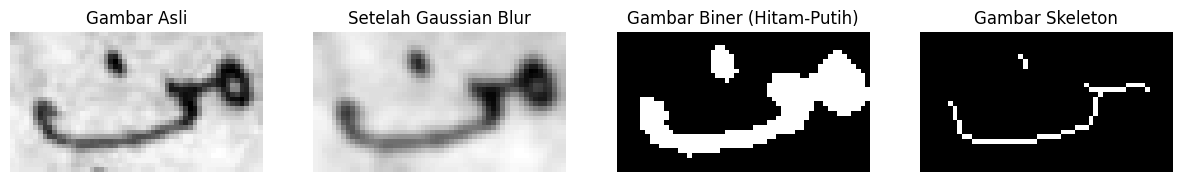

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar dalam mode grayscale
image_path = "percobaan.png"  # Ganti dengan nama file gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 1. Preprocessing dengan Gaussian Blur ===
blurred = cv2.GaussianBlur(image, (5,5), 0)  # Kernel 5x5 untuk menghaluskan gambar

# === 2. Binarisasi (ubah ke hitam-putih) ===
_, binary = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV)

# === 3. Skeletonisasi ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 4. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar dengan Gaussian Blur
plt.subplot(1, 4, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Setelah Gaussian Blur")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 4, 3)
plt.imshow(binary, cmap="gray")
plt.title("Gambar Biner (Hitam-Putih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 4, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()


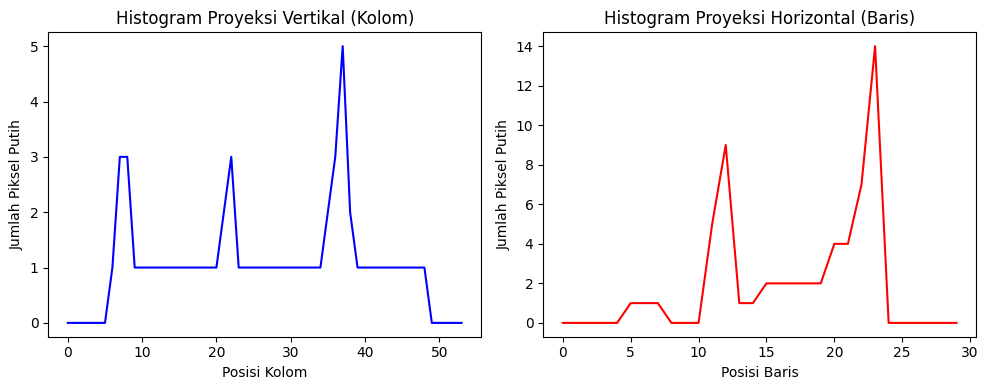

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar dalam mode grayscale
image_path = "percobaan.png"  # Ganti dengan nama file gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 1. Preprocessing dengan Gaussian Blur ===
blurred = cv2.GaussianBlur(image, (5,5), 0)  # Kernel 5x5 untuk menghaluskan gambar

# === 2. Binarisasi (ubah ke hitam-putih) ===
_, binary = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV)

# === 3. Skeletonisasi ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Check if skeleton is empty
if skeleton.size == 0:
    raise ValueError("Skeleton image is empty. Check your image or preprocessing steps.")

# === 5. Hitung Histogram Proyeksi ===

# Histogram proyeksi vertikal (jumlah piksel putih di setiap kolom)
histogram_vertikal = np.sum(skeleton == 255, axis=0)

# Histogram proyeksi horizontal (jumlah piksel putih di setiap baris)
histogram_horizontal = np.sum(skeleton == 255, axis=1)

# === 6. Tampilkan Histogram Proyeksi ===
plt.figure(figsize=(10, 4))

# Histogram Proyeksi Vertikal
plt.subplot(1, 2, 1)
plt.plot(histogram_vertikal, color='blue')
plt.title("Histogram Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Histogram Proyeksi Horizontal
plt.subplot(1, 2, 2)
plt.plot(histogram_horizontal, color='red')
plt.title("Histogram Proyeksi Horizontal (Baris)")
plt.xlabel("Posisi Baris")
plt.ylabel("Jumlah Piksel Putih")

plt.tight_layout()
plt.show()

Saving percobaan.png to percobaan (4).png


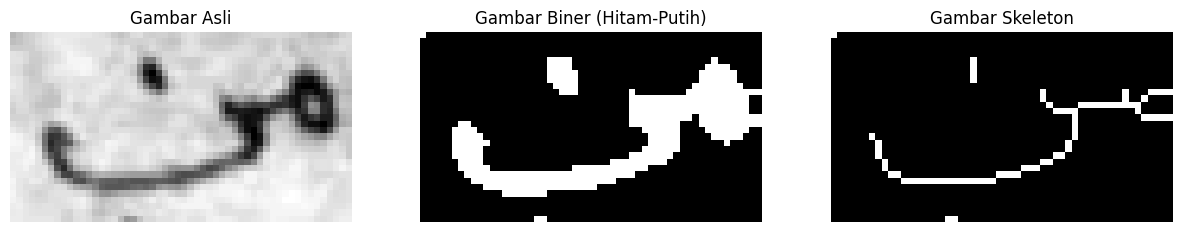

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# === 2. Lakukan Binarisasi (ubah ke hitam-putih) ===
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)  # 128 adalah nilai threshold

# === 3. Skeletonization ===
skeleton = skeletonize(binary > 0)  # Skeletonisasi menggunakan nilai boolean
skeleton = (skeleton * 255).astype(np.uint8)  # Ubah kembali ke skala 0-255

# === 4. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 3, 2)
plt.imshow(binary, cmap="gray")
plt.title("Gambar Biner (Hitam-Putih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 3, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()

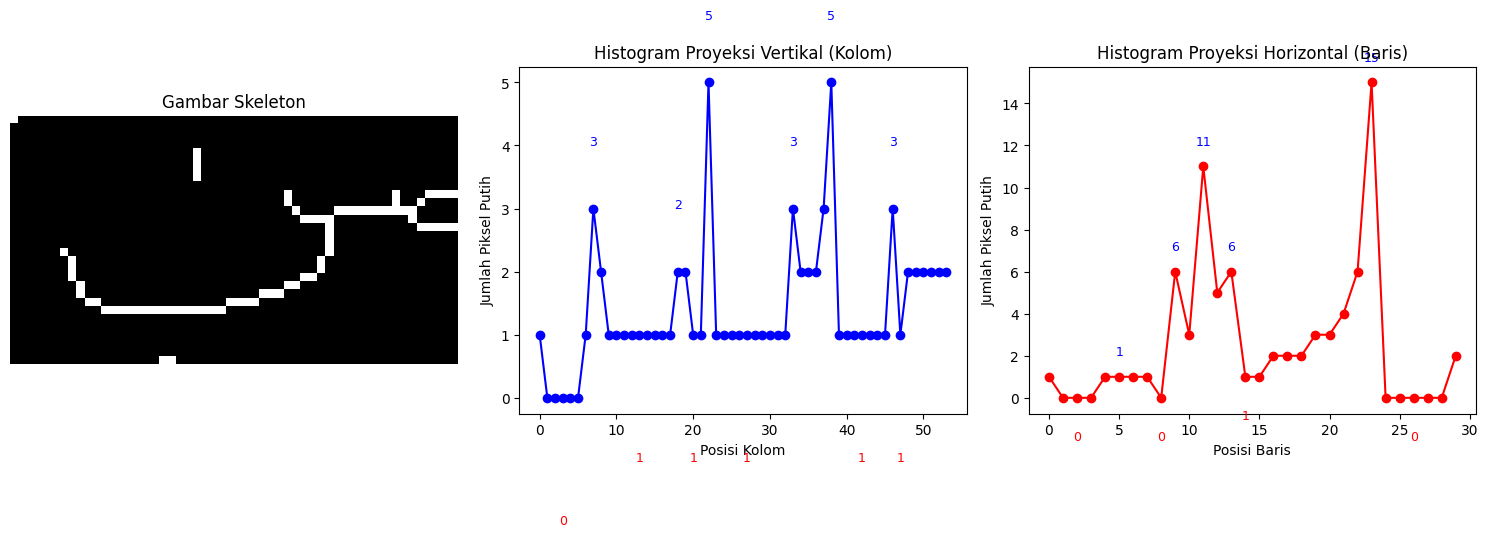

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from scipy.signal import find_peaks

# === 1. Load Gambar Skeleton ===
image_path = "percobaan.png"  # Pastikan sesuai dengan nama file gambar skeleton
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Binarisasi Gambar ===
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# === 3. Skeletonisasi ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 4. Hitung Histogram Proyeksi ===
vertical_projection = np.sum(skeleton > 0, axis=0)  # Histogram Vertikal (Kolom)
horizontal_projection = np.sum(skeleton > 0, axis=1)  # Histogram Horizontal (Baris)

# === 5. Deteksi Puncak dan Lembah pada Histogram ===
peaks_vert, _ = find_peaks(vertical_projection, height=1)  # Puncak Vertikal
troughs_vert, _ = find_peaks(-vertical_projection, height=-1)  # Lembah Vertikal

peaks_hor, _ = find_peaks(horizontal_projection, height=1)  # Puncak Horizontal
troughs_hor, _ = find_peaks(-horizontal_projection, height=-1)  # Lembah Horizontal

# === 6. Plot Hasil ===
plt.figure(figsize=(15, 6))

# === Gambar Skeleton ===
plt.subplot(1, 3, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

# === Histogram Proyeksi Vertikal ===
plt.subplot(1, 3, 2)
plt.plot(vertical_projection, color='b', linestyle='-', marker='o', label="Proyeksi Vertikal")
plt.title("Histogram Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Tambahkan label puncak dan lembah
for peak in peaks_vert:
    plt.text(peak, vertical_projection[peak] + 1, f'{vertical_projection[peak]}', color='blue', fontsize=9, ha='center')
for trough in troughs_vert:
    plt.text(trough, vertical_projection[trough] - 2, f'{vertical_projection[trough]}', color='red', fontsize=9, ha='center')

# === Histogram Proyeksi Horizontal ===
plt.subplot(1, 3, 3)
plt.plot(horizontal_projection, color='r', linestyle='-', marker='o', label="Proyeksi Horizontal")
plt.title("Histogram Proyeksi Horizontal (Baris)")
plt.xlabel("Posisi Baris")
plt.ylabel("Jumlah Piksel Putih")

# Tambahkan label puncak dan lembah
for peak in peaks_hor:
    plt.text(peak, horizontal_projection[peak] + 1, f'{horizontal_projection[peak]}', color='blue', fontsize=9, ha='center')
for trough in troughs_hor:
    plt.text(trough, horizontal_projection[trough] - 2, f'{horizontal_projection[trough]}', color='red', fontsize=9, ha='center')

plt.tight_layout()
plt.show()


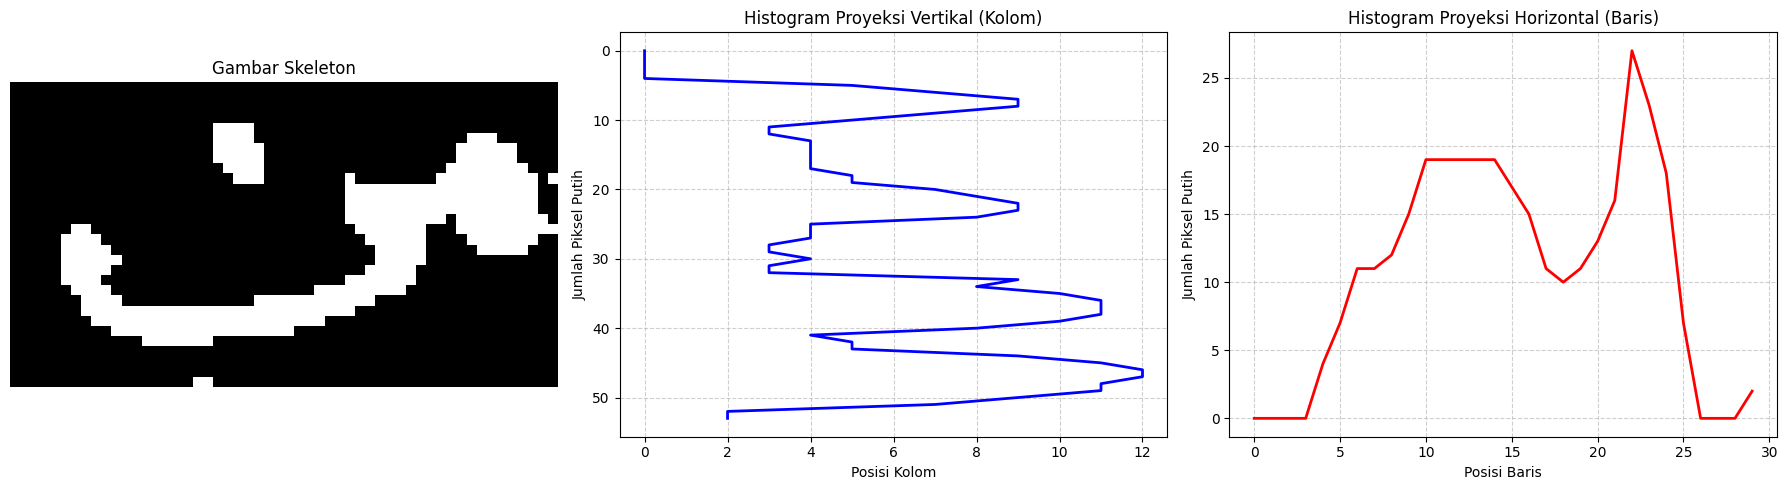

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar skeleton
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Konversi ke gambar biner
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Hitung histogram proyeksi vertikal (sum per kolom)
vertical_projection = np.sum(binary, axis=0) // 255

# Hitung histogram proyeksi horizontal (sum per baris)
horizontal_projection = np.sum(binary, axis=1) // 255

# Plot gambar skeleton dan histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tampilkan gambar skeleton
axes[0].imshow(binary, cmap='gray')
axes[0].set_title("Gambar Skeleton")
axes[0].axis("off")

# Histogram Proyeksi Vertikal
axes[1].plot(vertical_projection, range(len(vertical_projection)), color='blue', linewidth=2)
axes[1].invert_yaxis()
axes[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axes[1].set_xlabel("Posisi Kolom")
axes[1].set_ylabel("Jumlah Piksel Putih")
axes[1].grid(True, linestyle='--', alpha=0.6)

# Histogram Proyeksi Horizontal
axes[2].plot(range(len(horizontal_projection)), horizontal_projection, color='red', linewidth=2)
axes[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axes[2].set_xlabel("Posisi Baris")
axes[2].set_ylabel("Jumlah Piksel Putih")
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

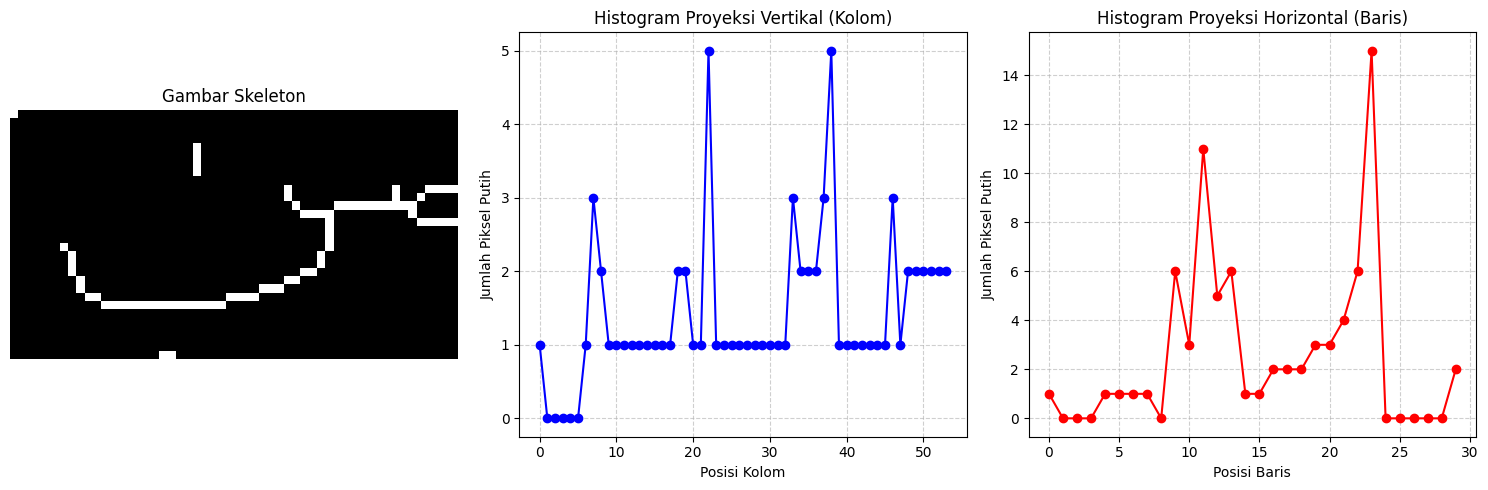

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load image
image_path = "percobaan.png"  # Sesuai dengan kode sebelumnya
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarisasi gambar
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Skeletonisasi
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Histogram Proyeksi Vertikal
vertical_histogram = np.sum(skeleton > 0, axis=0)

# Histogram Proyeksi Horizontal
horizontal_histogram = np.sum(skeleton > 0, axis=1)

# Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Tampilkan Gambar Skeleton
axes[0].imshow(skeleton, cmap="gray")
axes[0].set_title("Gambar Skeleton")
axes[0].axis("off")

# Tampilkan Histogram Vertikal
axes[1].plot(vertical_histogram, color='blue', marker='o', linestyle='-')
axes[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axes[1].set_xlabel("Posisi Kolom")
axes[1].set_ylabel("Jumlah Piksel Putih")
axes[1].grid(True, linestyle='--', alpha=0.6)

# Tampilkan Histogram Horizontal
axes[2].plot(horizontal_histogram, color='red', marker='o', linestyle='-')
axes[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axes[2].set_xlabel("Posisi Baris")
axes[2].set_ylabel("Jumlah Piksel Putih")
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


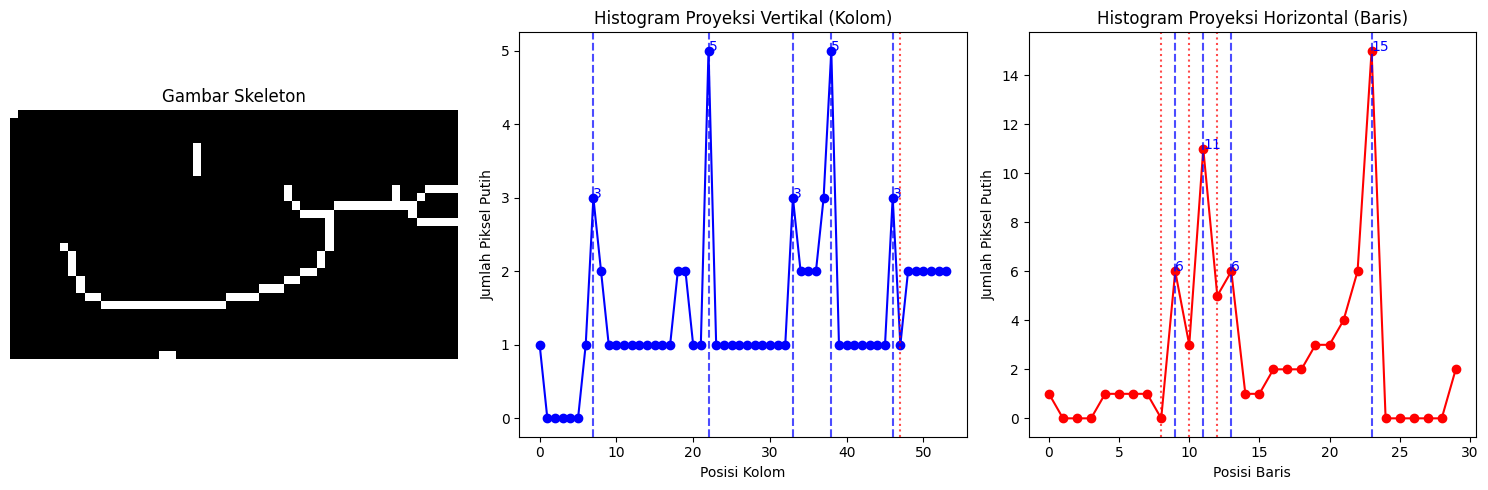

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar
image_path = "percobaan.png"  # Sesuaikan dengan path gambar dari kode sebelumnya
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarisasi
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Skeletonisasi
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Histogram proyeksi
vertical_projection = np.sum(skeleton == 255, axis=0)
horizontal_projection = np.sum(skeleton == 255, axis=1)

# Deteksi puncak dan lembah
def find_peaks_and_valleys(projection):
    peaks, valleys = [], []
    for i in range(1, len(projection) - 1):
        if projection[i] > projection[i-1] and projection[i] > projection[i+1]:  # Puncak
            peaks.append((i, projection[i]))
        if projection[i] < projection[i-1] and projection[i] < projection[i+1]:  # Lembah
            valleys.append((i, projection[i]))
    return peaks, valleys

v_peaks, v_valleys = find_peaks_and_valleys(vertical_projection)
h_peaks, h_valleys = find_peaks_and_valleys(horizontal_projection)

# Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gambar skeleton
axes[0].imshow(skeleton, cmap="gray")
axes[0].set_title("Gambar Skeleton")
axes[0].axis("off")

# Histogram Vertikal
axes[1].plot(vertical_projection, color="blue", marker="o")
axes[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axes[1].set_xlabel("Posisi Kolom")
axes[1].set_ylabel("Jumlah Piksel Putih")
for x, y in v_peaks:
    axes[1].axvline(x, color="blue", linestyle="dashed", alpha=0.7)  # Garis puncak
    axes[1].text(x, y, f"{y}", color="blue", fontsize=10)
for x, y in v_valleys:
    axes[1].axvline(x, color="red", linestyle="dotted", alpha=0.7)  # Garis lembah

# Histogram Horizontal
axes[2].plot(horizontal_projection, color="red", marker="o")
axes[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axes[2].set_xlabel("Posisi Baris")
axes[2].set_ylabel("Jumlah Piksel Putih")
for x, y in h_peaks:
    axes[2].axvline(x, color="blue", linestyle="dashed", alpha=0.7)  # Garis puncak
    axes[2].text(x, y, f"{y}", color="blue", fontsize=10)
for x, y in h_valleys:
    axes[2].axvline(x, color="red", linestyle="dotted", alpha=0.7)  # Garis lembah

plt.tight_layout()
plt.show()


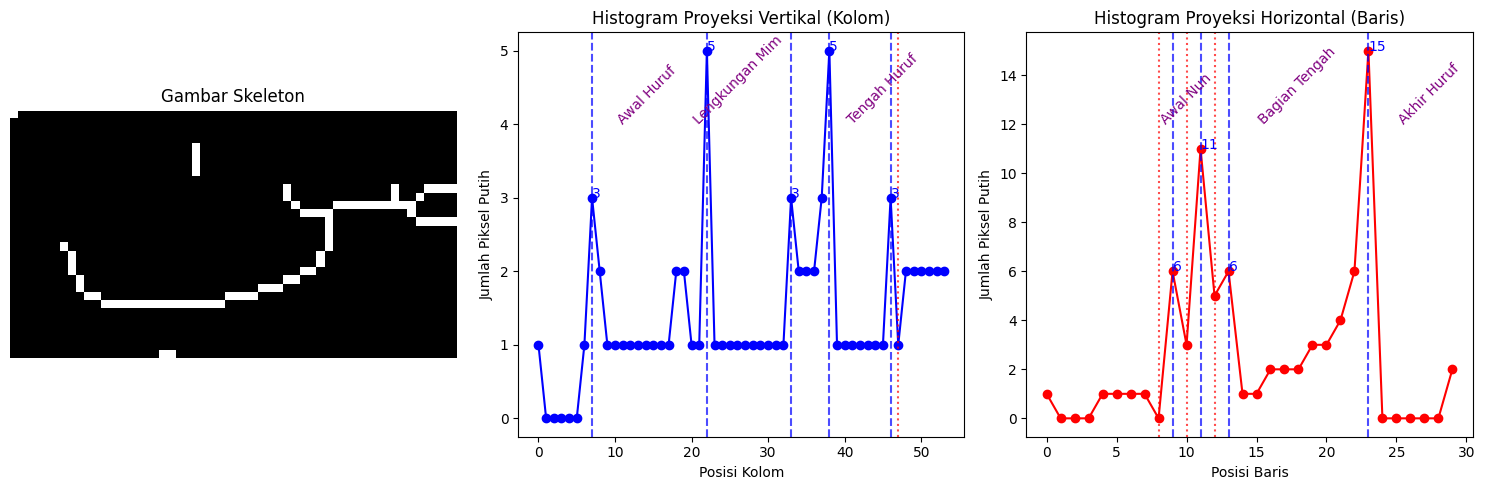

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar
image_path = "percobaan.png"  # Sesuaikan dengan path gambar dari kode sebelumnya
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarisasi
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Skeletonisasi
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Histogram proyeksi
vertical_projection = np.sum(skeleton == 255, axis=0)
horizontal_projection = np.sum(skeleton == 255, axis=1)

# Deteksi puncak dan lembah
def find_peaks_and_valleys(projection):
    peaks, valleys = [], []
    for i in range(1, len(projection) - 1):
        if projection[i] > projection[i-1] and projection[i] > projection[i+1]:  # Puncak
            peaks.append((i, projection[i]))
        if projection[i] < projection[i-1] and projection[i] < projection[i+1]:  # Lembah
            valleys.append((i, projection[i]))
    return peaks, valleys

v_peaks, v_valleys = find_peaks_and_valleys(vertical_projection)
h_peaks, h_valleys = find_peaks_and_valleys(horizontal_projection)

# Menentukan anotasi untuk bagian-bagian huruf (sesuaikan dengan gambar)
annotations = {
    "vertikal": {10: "Awal Huruf", 20: "Lengkungan Mim", 40: "Tengah Huruf"},
    "horizontal": {8: "Awal Nun", 15: "Bagian Tengah", 25: "Akhir Huruf"}
}

# Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gambar skeleton
axes[0].imshow(skeleton, cmap="gray")
axes[0].set_title("Gambar Skeleton")
axes[0].axis("off")

# Histogram Vertikal
axes[1].plot(vertical_projection, color="blue", marker="o")
axes[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axes[1].set_xlabel("Posisi Kolom")
axes[1].set_ylabel("Jumlah Piksel Putih")
for x, y in v_peaks:
    axes[1].axvline(x, color="blue", linestyle="dashed", alpha=0.7)  # Garis puncak
    axes[1].text(x, y, f"{y}", color="blue", fontsize=10)
for x, y in v_valleys:
    axes[1].axvline(x, color="red", linestyle="dotted", alpha=0.7)  # Garis lembah
# Tambahkan anotasi untuk vertikal
for x, label in annotations["vertikal"].items():
    axes[1].text(x, max(vertical_projection) * 0.8, label, rotation=45, color="purple", fontsize=10)

# Histogram Horizontal
axes[2].plot(horizontal_projection, color="red", marker="o")
axes[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axes[2].set_xlabel("Posisi Baris")
axes[2].set_ylabel("Jumlah Piksel Putih")
for x, y in h_peaks:
    axes[2].axvline(x, color="blue", linestyle="dashed", alpha=0.7)  # Garis puncak
    axes[2].text(x, y, f"{y}", color="blue", fontsize=10)
for x, y in h_valleys:
    axes[2].axvline(x, color="red", linestyle="dotted", alpha=0.7)  # Garis lembah
# Tambahkan anotasi untuk horizontal
for x, label in annotations["horizontal"].items():
    axes[2].text(x, max(horizontal_projection) * 0.8, label, rotation=45, color="purple", fontsize=10)

plt.tight_layout()
plt.show()


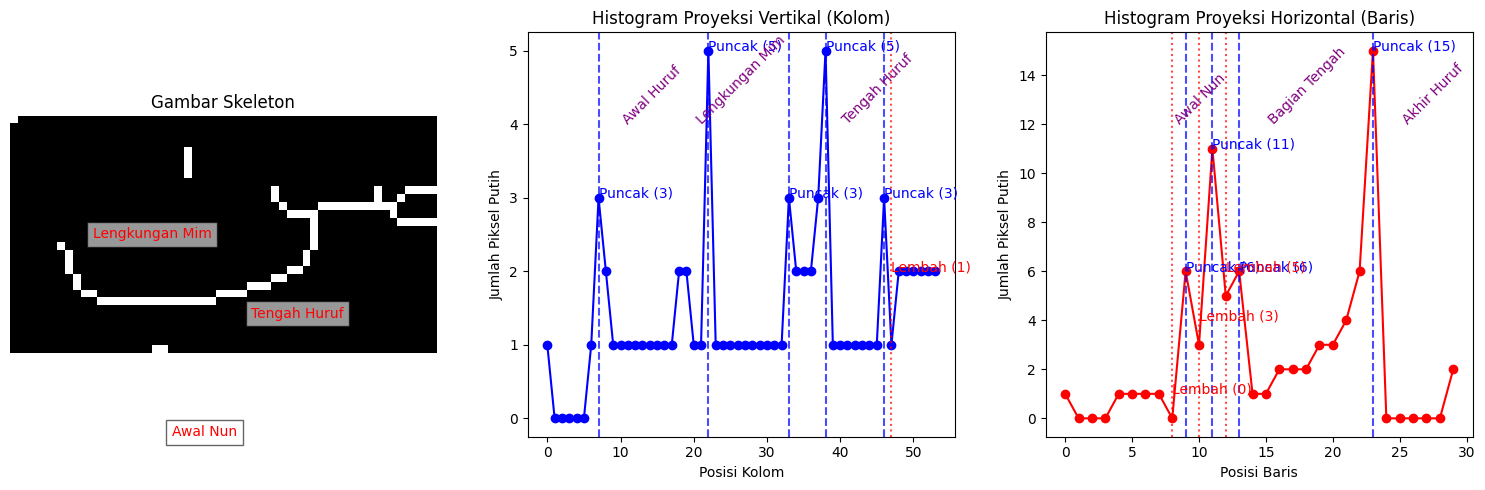

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar
image_path = "percobaan.png"  # Sesuaikan dengan path gambar dari kode sebelumnya
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarisasi
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Skeletonisasi
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Histogram proyeksi
vertical_projection = np.sum(skeleton == 255, axis=0)
horizontal_projection = np.sum(skeleton == 255, axis=1)

# Deteksi puncak dan lembah
def find_peaks_and_valleys(projection):
    peaks, valleys = [], []
    for i in range(1, len(projection) - 1):
        if projection[i] > projection[i-1] and projection[i] > projection[i+1]:  # Puncak
            peaks.append((i, projection[i]))
        if projection[i] < projection[i-1] and projection[i] < projection[i+1]:  # Lembah
            valleys.append((i, projection[i]))
    return peaks, valleys

v_peaks, v_valleys = find_peaks_and_valleys(vertical_projection)
h_peaks, h_valleys = find_peaks_and_valleys(horizontal_projection)

# Menentukan anotasi untuk bagian-bagian huruf (sesuaikan dengan gambar)
annotations = {
    "skeleton": {
        (15, 10): "Lengkungan Mim",
        (40, 20): "Awal Nun",
        (25, 30): "Tengah Huruf"
    },
    "vertical": {
        10: "Awal Huruf", 20: "Lengkungan Mim", 40: "Tengah Huruf"
    },
    "horizontal": {
        8: "Awal Nun", 15: "Bagian Tengah", 25: "Akhir Huruf"
    }
}

# Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gambar skeleton dengan anotasi
axes[0].imshow(skeleton, cmap="gray")
axes[0].set_title("Gambar Skeleton")
axes[0].axis("off")

# Tambahkan anotasi pada gambar skeleton
for (x, y), label in annotations["skeleton"].items():
    axes[0].text(y, x, label, color="red", fontsize=10, bbox=dict(facecolor="white", alpha=0.6))

# Histogram Vertikal
axes[1].plot(vertical_projection, color="blue", marker="o")
axes[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axes[1].set_xlabel("Posisi Kolom")
axes[1].set_ylabel("Jumlah Piksel Putih")
for x, y in v_peaks:
    axes[1].axvline(x, color="blue", linestyle="dashed", alpha=0.7)  # Garis puncak
    axes[1].text(x, y, f"Puncak ({y})", color="blue", fontsize=10)
for x, y in v_valleys:
    axes[1].axvline(x, color="red", linestyle="dotted", alpha=0.7)  # Garis lembah
    axes[1].text(x, y + 1, f"Lembah ({y})", color="red", fontsize=10)
# Tambahkan anotasi untuk vertikal
for x, label in annotations["vertical"].items():
    axes[1].text(x, max(vertical_projection) * 0.8, label, rotation=45, color="purple", fontsize=10)

# Histogram Horizontal
axes[2].plot(horizontal_projection, color="red", marker="o")
axes[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axes[2].set_xlabel("Posisi Baris")
axes[2].set_ylabel("Jumlah Piksel Putih")
for x, y in h_peaks:
    axes[2].axvline(x, color="blue", linestyle="dashed", alpha=0.7)  # Garis puncak
    axes[2].text(x, y, f"Puncak ({y})", color="blue", fontsize=10)
for x, y in h_valleys:
    axes[2].axvline(x, color="red", linestyle="dotted", alpha=0.7)  # Garis lembah
    axes[2].text(x, y + 1, f"Lembah ({y})", color="red", fontsize=10)
# Tambahkan anotasi untuk horizontal
for x, label in annotations["horizontal"].items():
    axes[2].text(x, max(horizontal_projection) * 0.8, label, rotation=45, color="purple", fontsize=10)

plt.tight_layout()
plt.show()


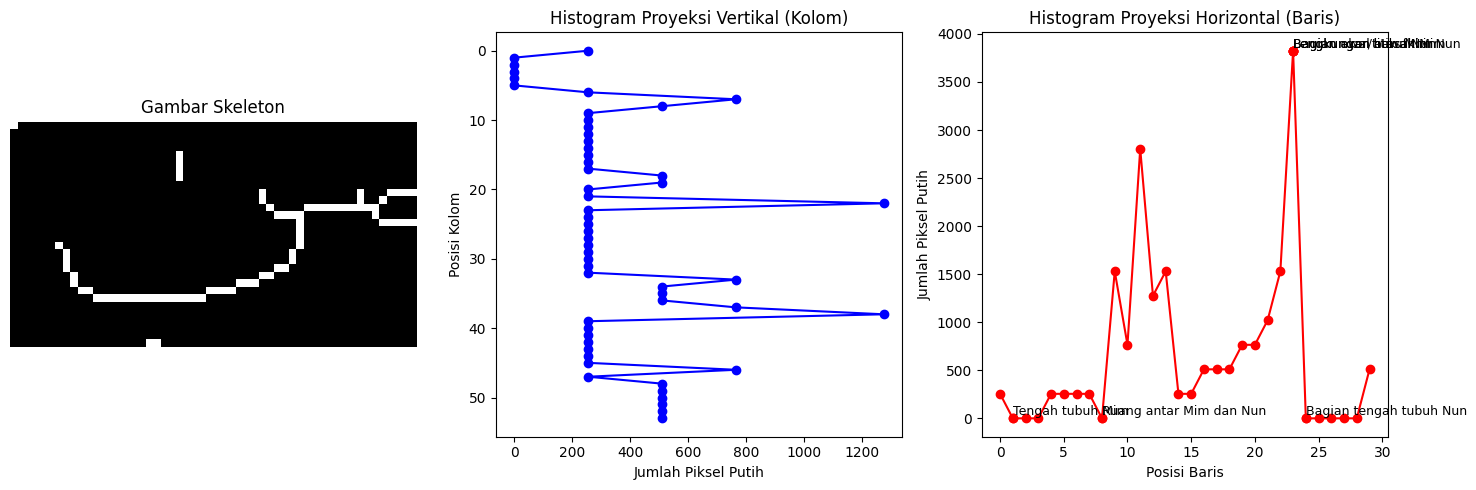

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar dalam mode grayscale
image_path = "percobaan.png"  # Sesuaikan dengan nama file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarisasi
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Skeletonisasi
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Hitung histogram proyeksi horizontal (baris) dan vertikal (kolom)
hist_vertical = np.sum(skeleton, axis=0)
hist_horizontal = np.sum(skeleton, axis=1)

# Cari puncak dan lembah utama
def find_peak_or_valley(data, start_idx, find_max=True):
    if start_idx >= len(data):
        return None, None
    sub_data = data[start_idx:]
    if len(sub_data) == 0:
        return None, None
    index = np.argmax(sub_data) if find_max else np.argmin(sub_data)
    return index + start_idx, data[index + start_idx]

# Label sesuai bagian huruf
labels = {
    "Lengkungan atas Mim": find_peak_or_valley(hist_horizontal, 0, True),
    "Tengah tubuh Mim": find_peak_or_valley(hist_horizontal, 0, False),
    "Lengkungan bawah Mim": find_peak_or_valley(hist_horizontal, 5, True),
    "Ruang antar Mim dan Nun": find_peak_or_valley(hist_horizontal, 5, False),
    "Bagian awal huruf Nun": find_peak_or_valley(hist_horizontal, 10, True),
    "Bagian tengah tubuh Nun": find_peak_or_valley(hist_horizontal, 10, False),
    "Bagian ekor/titik akhir Nun": find_peak_or_valley(hist_horizontal, 15, True),
}

# Buat plot untuk menampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gambar skeleton
axs[0].imshow(skeleton, cmap='gray')
axs[0].set_title("Gambar Skeleton")
axs[0].axis("off")

# Histogram proyeksi vertikal
axs[1].plot(hist_vertical, range(len(hist_vertical)), 'b-', marker='o')
axs[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axs[1].set_xlabel("Jumlah Piksel Putih")
axs[1].set_ylabel("Posisi Kolom")
axs[1].invert_yaxis()

# Histogram proyeksi horizontal
axs[2].plot(range(len(hist_horizontal)), hist_horizontal, 'r-', marker='o')
axs[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axs[2].set_xlabel("Posisi Baris")
axs[2].set_ylabel("Jumlah Piksel Putih")

# Tambahkan label pada histogram horizontal
for label, (x, y) in labels.items():
    if x is not None and y is not None:
        axs[2].scatter(x, y, color="red")
        axs[2].text(x, y, label, fontsize=9, verticalalignment='bottom')

plt.tight_layout()
plt.show()


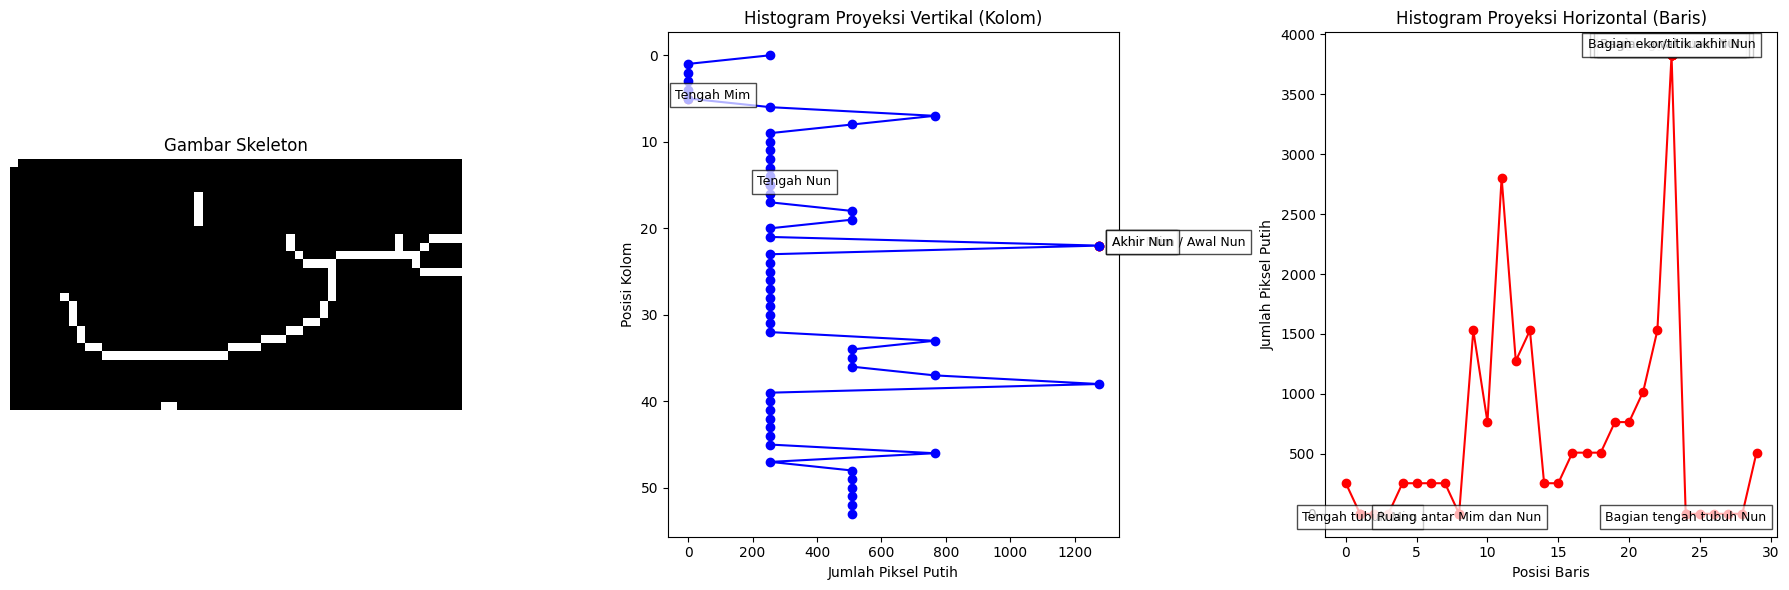

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar dalam mode grayscale
image_path = "percobaan.png"  # Sesuaikan dengan path file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarisasi
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Skeletonisasi
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Hitung histogram proyeksi horizontal (baris) dan vertikal (kolom)
hist_vertical = np.sum(skeleton, axis=0)
hist_horizontal = np.sum(skeleton, axis=1)

# Fungsi untuk mencari puncak dan lembah utama
def find_peak_or_valley(data, start_idx, find_max=True):
    if start_idx >= len(data):
        return None, None
    sub_data = data[start_idx:]
    if len(sub_data) == 0:
        return None, None
    index = np.argmax(sub_data) if find_max else np.argmin(sub_data)
    return index + start_idx, data[index + start_idx]

# Label sesuai bagian huruf pada histogram horizontal (baris)
labels_horizontal = {
    "Lengkungan atas Mim": find_peak_or_valley(hist_horizontal, 0, True),
    "Tengah tubuh Mim": find_peak_or_valley(hist_horizontal, 0, False),
    "Lengkungan bawah Mim": find_peak_or_valley(hist_horizontal, 5, True),
    "Ruang antar Mim dan Nun": find_peak_or_valley(hist_horizontal, 5, False),
    "Bagian awal huruf Nun": find_peak_or_valley(hist_horizontal, 10, True),
    "Bagian tengah tubuh Nun": find_peak_or_valley(hist_horizontal, 10, False),
    "Bagian ekor/titik akhir Nun": find_peak_or_valley(hist_horizontal, 15, True),
}

# Label sesuai bagian huruf pada histogram vertikal (kolom)
labels_vertical = {
    "Awal Mim": find_peak_or_valley(hist_vertical, 0, True),
    "Tengah Mim": find_peak_or_valley(hist_vertical, 5, False),
    "Akhir Mim / Awal Nun": find_peak_or_valley(hist_vertical, 10, True),
    "Tengah Nun": find_peak_or_valley(hist_vertical, 15, False),
    "Akhir Nun": find_peak_or_valley(hist_vertical, 20, True),
}

# Buat plot untuk menampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gambar skeleton
axs[0].imshow(skeleton, cmap='gray')
axs[0].set_title("Gambar Skeleton")
axs[0].axis("off")

# Histogram proyeksi vertikal
axs[1].plot(hist_vertical, range(len(hist_vertical)), 'b-', marker='o')
axs[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axs[1].set_xlabel("Jumlah Piksel Putih")
axs[1].set_ylabel("Posisi Kolom")
axs[1].invert_yaxis()

# Tambahkan label pada histogram vertikal
for i, (label, (x, y)) in enumerate(labels_vertical.items()):
    if x is not None and y is not None:
        axs[1].scatter(y, x, color="red")
        horizontal_offset = 40 if i % 2 == 0 else -40  # Selang-seling kiri dan kanan
        axs[1].text(y + horizontal_offset, x, label, fontsize=9, ha='left', bbox=dict(facecolor='white', alpha=0.7))

# Histogram proyeksi horizontal
axs[2].plot(range(len(hist_horizontal)), hist_horizontal, 'r-', marker='o')
axs[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axs[2].set_xlabel("Posisi Baris")
axs[2].set_ylabel("Jumlah Piksel Putih")

# Tambahkan label pada histogram horizontal
for i, (label, (x, y)) in enumerate(labels_horizontal.items()):
    if x is not None and y is not None:
        axs[2].scatter(x, y, color="red")
        vertical_offset = 60 if i % 2 == 0 else -60  # Lebih jauh agar tidak bertumpuk
        axs[2].text(x, y + vertical_offset, label, fontsize=9, ha='center', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


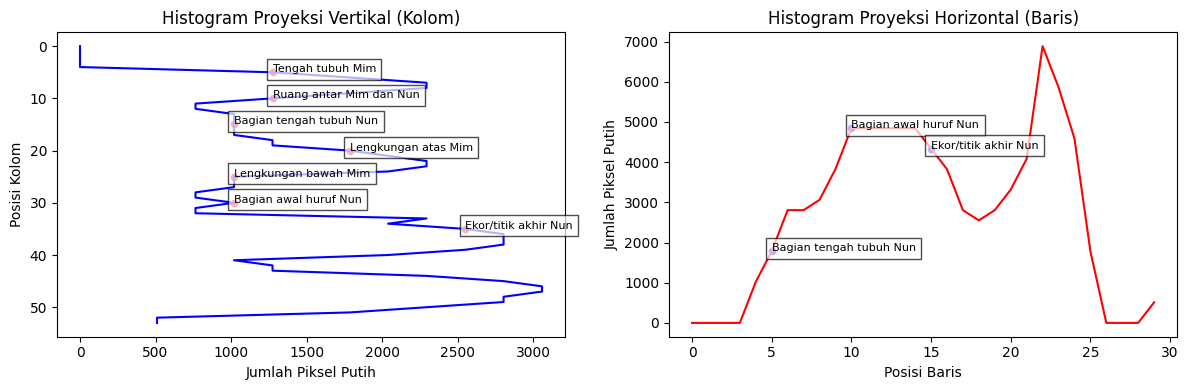

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load citra biner
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Histogram Proyeksi Vertikal
hist_vertical = np.sum(binary_image, axis=0)

# Histogram Proyeksi Horizontal
hist_horizontal = np.sum(binary_image, axis=1)

# Plot hasilnya
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram Vertikal
axes[0].plot(hist_vertical, range(len(hist_vertical)), color='blue')
axes[0].invert_yaxis()
axes[0].set_title("Histogram Proyeksi Vertikal (Kolom)")
axes[0].set_xlabel("Jumlah Piksel Putih")
axes[0].set_ylabel("Posisi Kolom")

# Tambahkan label untuk titik penting pada histogram vertikal
vertical_labels = {
    "Tengah tubuh Mim": (5, hist_vertical[5]),
    "Ruang antar Mim dan Nun": (10, hist_vertical[10]),
    "Bagian tengah tubuh Nun": (15, hist_vertical[15]),
    "Lengkungan atas Mim": (20, hist_vertical[20]),
    "Lengkungan bawah Mim": (25, hist_vertical[25]),
    "Bagian awal huruf Nun": (30, hist_vertical[30]),
    "Ekor/titik akhir Nun": (35, hist_vertical[35]),
}
for label, (x, y) in vertical_labels.items():
    axes[0].text(y, x, label, fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
    axes[0].scatter(y, x, color='red', s=20)

# Histogram Horizontal
axes[1].plot(range(len(hist_horizontal)), hist_horizontal, color='red')
axes[1].set_title("Histogram Proyeksi Horizontal (Baris)")
axes[1].set_xlabel("Posisi Baris")
axes[1].set_ylabel("Jumlah Piksel Putih")

# Tambahkan label untuk titik penting pada histogram horizontal
horizontal_labels = {
    "Bagian tengah tubuh Nun": (5, hist_horizontal[5]),
    "Bagian awal huruf Nun": (10, hist_horizontal[10]),
    "Ekor/titik akhir Nun": (15, hist_horizontal[15]),
}
for label, (x, y) in horizontal_labels.items():
    axes[1].text(x, y, label, fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
    axes[1].scatter(x, y, color='blue', s=20)

plt.tight_layout()
plt.show()


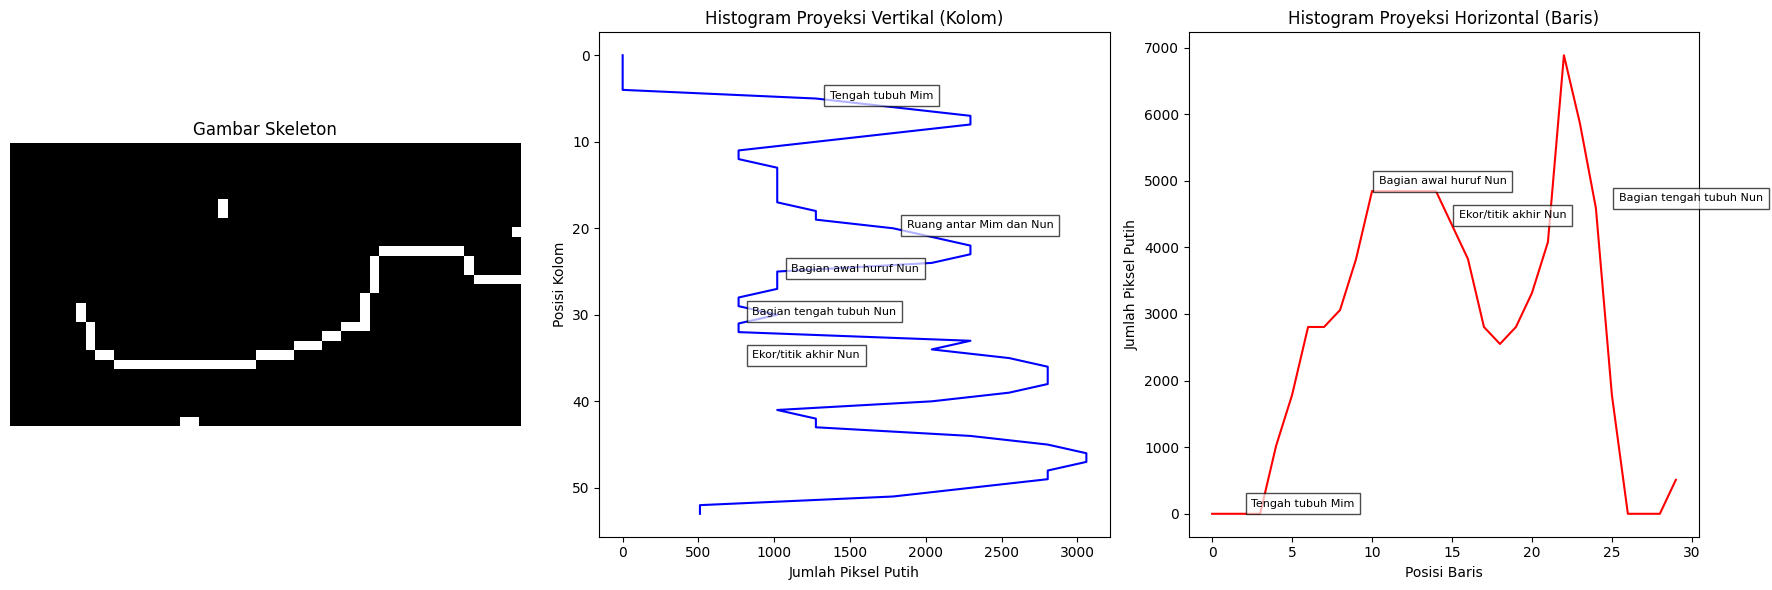

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load citra grayscale
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarisasi citra
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Proyeksi vertikal (kolom)
hist_vertical = np.sum(binary, axis=0)

# Proyeksi horizontal (baris)
hist_horizontal = np.sum(binary, axis=1)

# Skeletonisasi citra
skeleton = cv2.ximgproc.thinning(binary)

# Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Skeleton
axes[0].imshow(skeleton, cmap='gray')
axes[0].set_title("Gambar Skeleton")
axes[0].axis("off")

# Plot Histogram Proyeksi Vertikal
axes[1].plot(hist_vertical, range(len(hist_vertical)), 'b-')
axes[1].invert_yaxis()
axes[1].set_title("Histogram Proyeksi Vertikal (Kolom)")
axes[1].set_xlabel("Jumlah Piksel Putih")
axes[1].set_ylabel("Posisi Kolom")

# Label pada histogram vertikal
vert_labels = {
    "Tengah tubuh Mim": (5, hist_vertical[5]),
    "Ruang antar Mim dan Nun": (20, hist_vertical[20]),
    "Bagian awal huruf Nun": (25, hist_vertical[25]),
    "Bagian tengah tubuh Nun": (30, hist_vertical[29]),
    "Ekor/titik akhir Nun": (35, hist_vertical[28])
}
for label, (y, x) in vert_labels.items():
    axes[1].annotate(label, (x, y), textcoords="offset points", xytext=(10, 0), fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.7))

# Plot Histogram Proyeksi Horizontal
axes[2].plot(range(len(hist_horizontal)), hist_horizontal, 'r-')
axes[2].set_title("Histogram Proyeksi Horizontal (Baris)")
axes[2].set_xlabel("Posisi Baris")
axes[2].set_ylabel("Jumlah Piksel Putih")

# Label pada histogram horizontal
horiz_labels = {
    "Bagian awal huruf Nun": (10, hist_horizontal[10]),
    "Ekor/titik akhir Nun": (15, hist_horizontal[15]),
    "Tengah tubuh Mim": (2, hist_horizontal[2]),
    "Bagian tengah tubuh Nun": (25, hist_horizontal[24])
}
for label, (y, x) in horiz_labels.items():
    axes[2].annotate(label, (y, x), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

Saving percobaan.png to percobaan.png


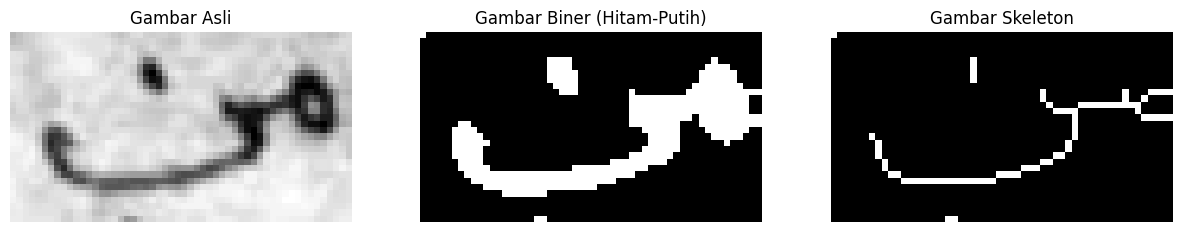

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# === 2. Lakukan Binarisasi (ubah ke hitam-putih) ===
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)  # 128 adalah nilai threshold

# === 3. Skeletonization ===
skeleton = skeletonize(binary > 0)  # Skeletonisasi menggunakan nilai boolean
skeleton = (skeleton * 255).astype(np.uint8)  # Ubah kembali ke skala 0-255

# === 4. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 3, 2)
plt.imshow(binary, cmap="gray")
plt.title("Gambar Biner (Hitam-Putih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 3, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()


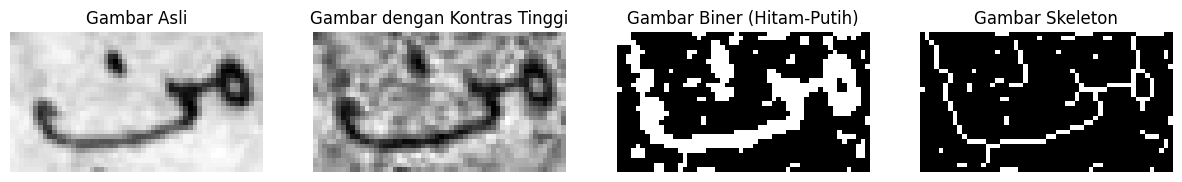

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Baca gambar dalam skala abu-abu
image_path = "percobaan.png"  # Pastikan file ada di direktori kerja
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 1. Tingkatkan Kontras menggunakan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
enhanced_image = clahe.apply(image)

# === 2. Lakukan Binarisasi (ubah ke hitam-putih) ===
_, binary = cv2.threshold(enhanced_image, 128, 255, cv2.THRESH_BINARY_INV)

# === 3. Skeletonization ===
skeleton = skeletonize(binary > 0)  # Skeletonisasi menggunakan nilai boolean
skeleton = (skeleton * 255).astype(np.uint8)  # Ubah kembali ke skala 0-255

# === 4. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Kontras Ditingkatkan
plt.subplot(1, 4, 2)
plt.imshow(enhanced_image, cmap="gray")
plt.title("Gambar dengan Kontras Tinggi")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 4, 3)
plt.imshow(binary, cmap="gray")
plt.title("Gambar Biner (Hitam-Putih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 4, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()


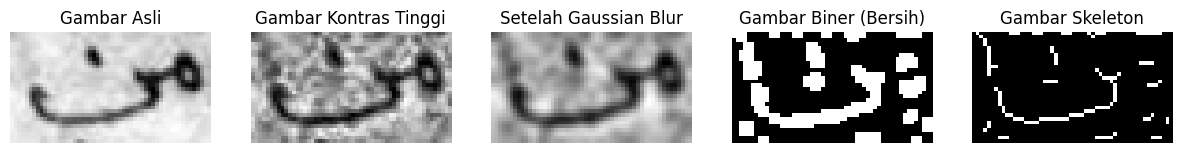

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Baca gambar dalam skala abu-abu
image_path = "percobaan.png"  # Pastikan file ada di direktori kerja
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 1. Tingkatkan Kontras menggunakan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
enhanced_image = clahe.apply(image)

# === 2. Gunakan Gaussian Blur untuk mengurangi noise ===
blurred = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

# === 3. Lakukan Adaptive Thresholding untuk binarisasi ===
binary = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# === 4. Gunakan Morphological Opening untuk menghilangkan noise kecil ===
kernel = np.ones((3,3), np.uint8)
binary_cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# === 5. Skeletonization ===
skeleton = skeletonize(binary_cleaned > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 6. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Kontras Ditingkatkan
plt.subplot(1, 5, 2)
plt.imshow(enhanced_image, cmap="gray")
plt.title("Gambar Kontras Tinggi")
plt.axis("off")

# Gambar Setelah Gaussian Blur
plt.subplot(1, 5, 3)
plt.imshow(blurred, cmap="gray")
plt.title("Setelah Gaussian Blur")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 5, 4)
plt.imshow(binary_cleaned, cmap="gray")
plt.title("Gambar Biner (Bersih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()


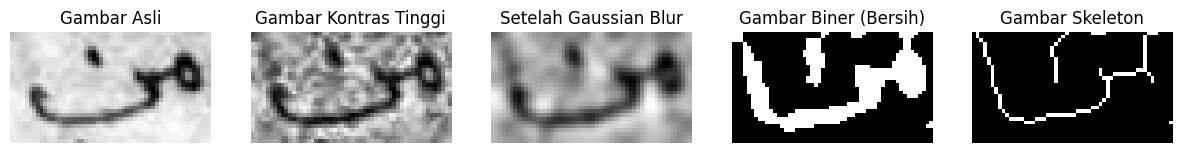

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Baca gambar dalam skala abu-abu
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 1. Tingkatkan Kontras menggunakan CLAHE dengan parameter lebih kecil ===
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  # Kurangi clipLimit
enhanced_image = clahe.apply(image)

# === 2. Gunakan Gaussian Blur untuk mengurangi noise ===
blurred = cv2.GaussianBlur(enhanced_image, (7, 7), 0)  # Perbesar kernel

# === 3. Gunakan Thresholding Otsu untuk binarisasi otomatis ===
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# === 4. Gunakan Morphological Closing untuk menutup lubang kecil ===
kernel = np.ones((3,3), np.uint8)
binary_cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)  # Closing untuk memperbaiki bentuk

# === 5. Skeletonization dengan hasil lebih halus ===
skeleton = skeletonize(binary_cleaned > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 6. Tampilkan Hasil ===
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Kontras Ditingkatkan
plt.subplot(1, 5, 2)
plt.imshow(enhanced_image, cmap="gray")
plt.title("Gambar Kontras Tinggi")
plt.axis("off")

# Gambar Setelah Gaussian Blur
plt.subplot(1, 5, 3)
plt.imshow(blurred, cmap="gray")
plt.title("Setelah Gaussian Blur")
plt.axis("off")

# Gambar Biner
plt.subplot(1, 5, 4)
plt.imshow(binary_cleaned, cmap="gray")
plt.title("Gambar Biner (Bersih)")
plt.axis("off")

# Gambar Skeleton
plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()


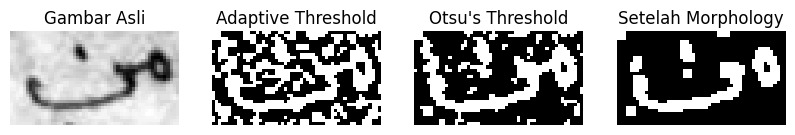

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar grayscale
image = cv2.imread("percobaan.png", cv2.IMREAD_GRAYSCALE)

# === Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_contrast = clahe.apply(image)

# === Gunakan Adaptive Thresholding ===
binary_adaptive = cv2.adaptiveThreshold(
    image_contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

# === Gunakan Otsu's Thresholding ===
_, binary_otsu = cv2.threshold(image_contrast, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# === Morphological Opening untuk mengurangi noise ===
kernel = np.ones((3,3), np.uint8)
binary_cleaned = cv2.morphologyEx(binary_otsu, cv2.MORPH_OPEN, kernel)

# === Tampilkan hasil ===
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(binary_adaptive, cmap="gray")
plt.title("Adaptive Threshold")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(binary_otsu, cmap="gray")
plt.title("Otsu's Threshold")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(binary_cleaned, cmap="gray")
plt.title("Setelah Morphology")
plt.axis("off")

plt.show()


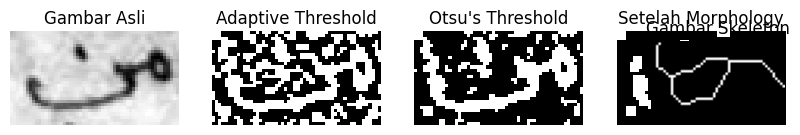

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar grayscale
image = cv2.imread("percobaan.png", cv2.IMREAD_GRAYSCALE)

# === Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_contrast = clahe.apply(image)

# === Gunakan Adaptive Thresholding ===
binary_adaptive = cv2.adaptiveThreshold(
    image_contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

# === Gunakan Otsu's Thresholding ===
_, binary_otsu = cv2.threshold(image_contrast, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# === Morphological Opening untuk mengurangi noise ===
kernel = np.ones((3,3), np.uint8)
binary_cleaned = cv2.morphologyEx(binary_otsu, cv2.MORPH_OPEN, kernel)

# === . Skeletonization ===
skeleton = skeletonize(binary_morph > 0)  # Skeletonisasi menggunakan nilai boolean
skeleton = (skeleton * 255).astype(np.uint8)  # Ubah kembali ke skala 0-255


# === Tampilkan hasil ===
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(binary_adaptive, cmap="gray")
plt.title("Adaptive Threshold")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(binary_otsu, cmap="gray")
plt.title("Otsu's Threshold")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(binary_cleaned, cmap="gray")
plt.title("Setelah Morphology")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Gambar Skeleton")
plt.axis("off")

plt.show()


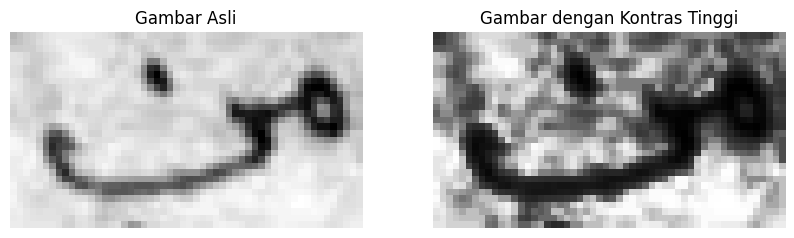

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan Histogram Equalization ===
image_contrast = cv2.equalizeHist(image)

# === 3. Tampilkan Gambar Sebelum dan Sesudah Kontras ===
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_contrast, cmap="gray")
plt.title("Gambar dengan Kontras Tinggi")
plt.axis("off")

plt.show()


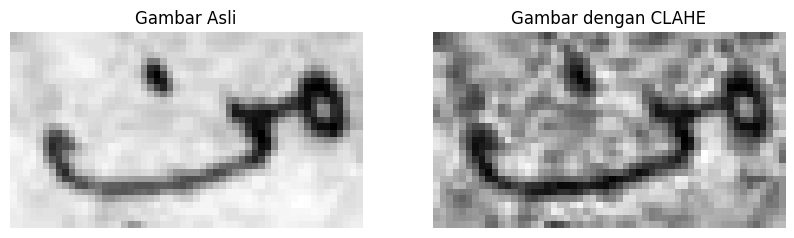

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# === 3. Tampilkan Gambar Sebelum dan Sesudah Kontras ===
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("Gambar dengan CLAHE")
plt.axis("off")

plt.show()


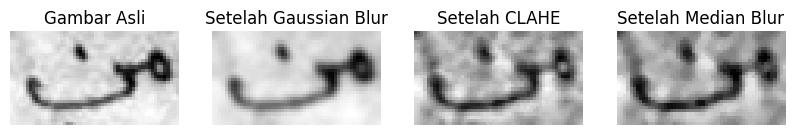

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Kurangi Noise dengan Gaussian Blur ===
image_blur = cv2.GaussianBlur(image, (5, 5), 0)

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)

# Eksperimen ukuran kernel Median Blur
kernel_size = 7  # Sesuaikan ukuran kernel di sini (coba 3, 5, 7, dst.)
image_median = cv2.medianBlur(image_clahe, kernel_size)


# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(image_blur, cmap="gray")
plt.title("Setelah Gaussian Blur")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(image_clahe, cmap="gray")
plt.title("Setelah CLAHE")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(image_filtered, cmap="gray")
plt.title("Setelah Median Blur")
plt.axis("off")

plt.show()

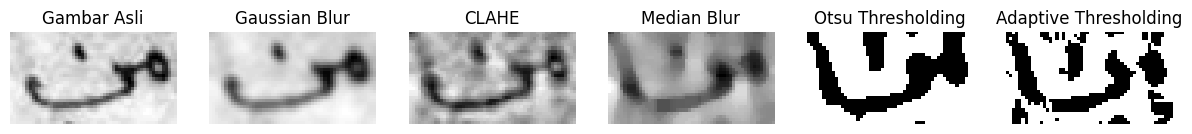

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Kurangi Noise dengan Gaussian Blur ===
image_blur = cv2.GaussianBlur(image, (5, 5), 0)

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Terapkan Bilateral Filter ===
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)

# === 5. Terapkan Median Blur ===
kernel_size = 5  # Sesuaikan ukuran kernel di sini (coba 3, 5, 7, dst.)
image_median = cv2.medianBlur(image_clahe, kernel_size)

# === 6. Thresholding Otsu ===
_, binary_otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 7. Thresholding Adaptive Gaussian ===
binary_adaptive = cv2.adaptiveThreshold(image_median, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# === Tampilkan hasil ===
plt.figure(figsize=(15, 5))

plt.subplot(1, 6, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 6, 2)
plt.imshow(image_blur, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 6, 3)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE")
plt.axis("off")

plt.subplot(1, 6, 4)
plt.imshow(image_median, cmap="gray")
plt.title("Median Blur")
plt.axis("off")

plt.subplot(1, 6, 5)
plt.imshow(binary_otsu, cmap="gray")
plt.title("Otsu Thresholding")
plt.axis("off")

plt.subplot(1, 6, 6)
plt.imshow(binary_adaptive, cmap="gray")
plt.title("Adaptive Thresholding")
plt.axis("off")

plt.show()


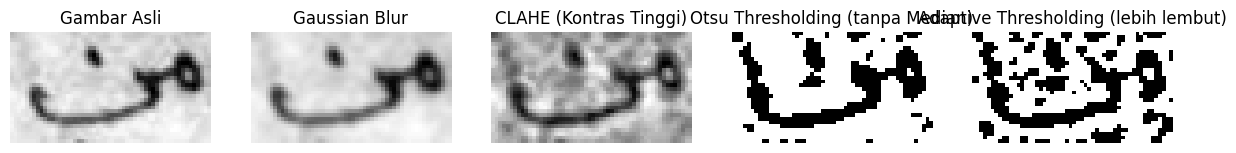

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Kurangi Noise dengan Gaussian Blur ===
image_blur = cv2.GaussianBlur(image, (3, 3), 0)

# === 3. Tingkatkan Kontras dengan CLAHE (lebih agresif) ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Terapkan Bilateral Filter (lebih halus daripada median blur) ===
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)

# === 5. Terapkan Thresholding langsung pada hasil CLAHE (tanpa median blur) ===
_, binary_otsu = cv2.threshold(image_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binary_adaptive = cv2.adaptiveThreshold(image_clahe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 15, 5)

# === Tampilkan hasil ===
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_blur, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(binary_otsu, cmap="gray")
plt.title("Otsu Thresholding (tanpa Median)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(binary_adaptive, cmap="gray")
plt.title("Adaptive Thresholding (lebih lembut)")
plt.axis("off")

plt.show()


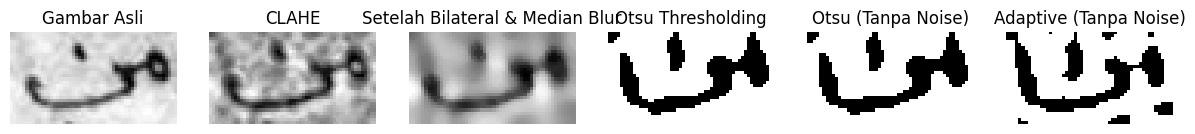

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Kurangi Noise dengan Gaussian Blur ===
image_blur = cv2.GaussianBlur(image, (3, 3), 0)

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Gunakan Bilateral Filtering untuk Menghaluskan Noise ===
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)

# === 5. Gunakan Median Blur untuk Menghilangkan Noise Kecil ===
image_median = cv2.medianBlur(image_bilateral, 3)

# === 6. Terapkan Thresholding ===
_, binary_otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binary_adaptive = cv2.adaptiveThreshold(image_median, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 15, 5)

# === 7. Bersihkan Noise dengan Morphological Opening ===
kernel = np.ones((3,3), np.uint8)
binary_otsu_clean = cv2.morphologyEx(binary_otsu, cv2.MORPH_OPEN, kernel)
binary_adaptive_clean = cv2.morphologyEx(binary_adaptive, cv2.MORPH_OPEN, kernel)

# === Tampilkan hasil ===
plt.figure(figsize=(15, 5))

plt.subplot(1, 6, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 6, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE")
plt.axis("off")

plt.subplot(1, 6, 3)
plt.imshow(image_median, cmap="gray")
plt.title("Setelah Bilateral & Median Blur")
plt.axis("off")

plt.subplot(1, 6, 4)
plt.imshow(binary_otsu, cmap="gray")
plt.title("Otsu Thresholding")
plt.axis("off")

plt.subplot(1, 6, 5)
plt.imshow(binary_otsu_clean, cmap="gray")
plt.title("Otsu (Tanpa Noise)")
plt.axis("off")

plt.subplot(1, 6, 6)
plt.imshow(binary_adaptive_clean, cmap="gray")
plt.title("Adaptive (Tanpa Noise)")
plt.axis("off")

plt.show()


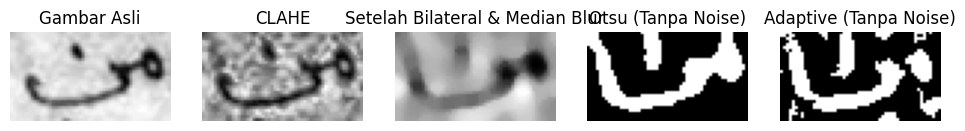

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# === 3. Kurangi Noise dengan Bilateral Filter & Median Blur ===
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)
kernel_size = 7  # Sesuaikan ukuran kernel
image_median = cv2.medianBlur(image_bilateral, kernel_size)

# === 4. Thresholding ===
# Otsu Thresholding
_, otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_inv = cv2.bitwise_not(otsu)  # Inversi agar huruf putih

# Adaptive Thresholding
adaptive = cv2.adaptiveThreshold(image_median, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)
adaptive_inv = cv2.bitwise_not(adaptive)  # Inversi agar huruf putih

# === 5. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_median, cmap="gray")
plt.title("Setelah Bilateral & Median Blur")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(otsu_inv, cmap="gray")
plt.title("Otsu (Tanpa Noise)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(adaptive_inv, cmap="gray")
plt.title("Adaptive (Tanpa Noise)")
plt.axis("off")

plt.show()

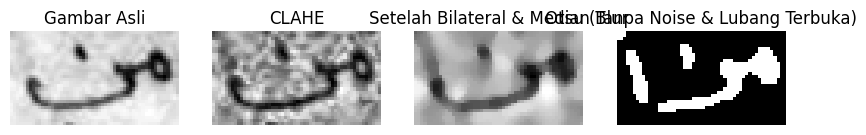

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=1.2, tileGridSize=(8, 8))  # Clip limit dikurangi untuk menjaga detail kecil
image_clahe = clahe.apply(image)

# === 3. Kurangi Noise dengan Bilateral Filter & Median Blur ===
image_bilateral = cv2.bilateralFilter(image_clahe, 7, 50, 50)  # Mengurangi parameter sigmaColor dan sigmaSpace
image_median = cv2.medianBlur(image_bilateral, 5)  # Kernel lebih kecil agar detail tetap terlihat

# === 4. Otsu Thresholding ===
_, otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_inv = cv2.bitwise_not(otsu)  # Inversi agar huruf putih

# === 5. Perbaiki Lubang dalam Huruf dengan Morphological Opening ===
kernel = np.ones((3,3), np.uint8)  # Kernel kecil agar tidak merusak struktur huruf
otsu_cleaned = cv2.morphologyEx(otsu_inv, cv2.MORPH_OPEN, kernel)

# === 6. Tampilkan hasil ===
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(image_median, cmap="gray")
plt.title("Setelah Bilateral & Median Blur")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(otsu_cleaned, cmap="gray")
plt.title("Otsu (Tanpa Noise & Lubang Terbuka)")
plt.axis("off")

plt.show()


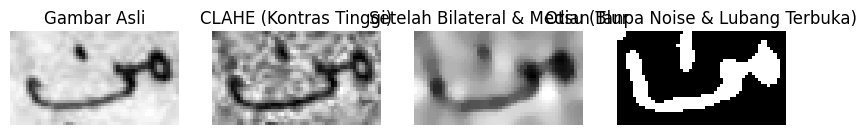

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE (Lebih Kuat) ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))  # Clip limit lebih besar
image_clahe = clahe.apply(image)

# === 3. Kurangi Noise dengan Bilateral Filter & Median Blur ===
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)
kernel_size = 5  # Kernel lebih kecil agar tidak menghilangkan detail
image_median = cv2.medianBlur(image_bilateral, kernel_size)

# === 4. Thresholding dengan Otsu (Tanpa Noise & Lubang Terbuka) ===
_, otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_inv = cv2.bitwise_not(otsu)  # Inversi agar huruf putih

# === 5. Tampilkan hasil ===
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(image_median, cmap="gray")
plt.title("Setelah Bilateral & Median Blur")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(otsu_inv, cmap="gray")
plt.title("Otsu (Tanpa Noise & Lubang Terbuka)")
plt.axis("off")

plt.show()


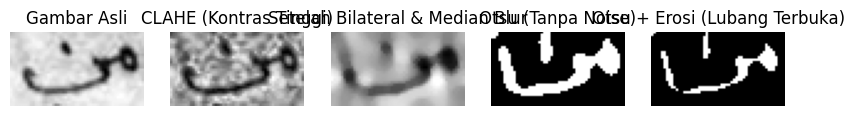

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# === 3. Kurangi Noise dengan Bilateral Filter & Median Blur ===
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)
kernel_size = 5
image_median = cv2.medianBlur(image_bilateral, kernel_size)

# === 4. Otsu Thresholding ===
_, otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_inv = cv2.bitwise_not(otsu)  # Inversi agar huruf putih

# === 5. Morfologi Erosi untuk membuka lubang Mim ===
kernel = np.ones((3, 3), np.uint8)  # Kernel kecil agar tidak merusak bentuk huruf
otsu_eroded = cv2.erode(otsu_inv, kernel, iterations=1)

# === 6. Tampilkan hasil ===
plt.figure(figsize=(10, 3))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_median, cmap="gray")
plt.title("Setelah Bilateral & Median Blur")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(otsu_inv, cmap="gray")
plt.title("Otsu (Tanpa Noise)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(otsu_eroded, cmap="gray")
plt.title("Otsu + Erosi (Lubang Terbuka)")
plt.axis("off")

plt.show()


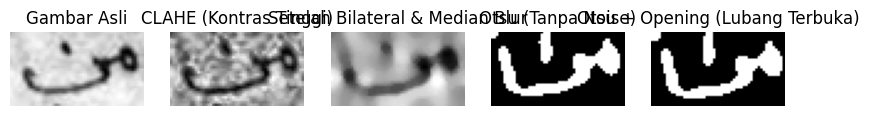

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# === 3. Kurangi Noise dengan Bilateral Filter & Median Blur ===
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)
kernel_size = 5
image_median = cv2.medianBlur(image_bilateral, kernel_size)

# === 4. Otsu Thresholding ===
_, otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_inv = cv2.bitwise_not(otsu)  # Inversi agar huruf putih

# === 5. Morfologi Opening untuk membuka lubang Mim ===
kernel = np.ones((2, 2), np.uint8)  # Kernel lebih kecil untuk efek lebih halus
otsu_opening = cv2.morphologyEx(otsu_inv, cv2.MORPH_OPEN, kernel, iterations=1)

# === 6. Tampilkan hasil ===
plt.figure(figsize=(10, 3))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_median, cmap="gray")
plt.title("Setelah Bilateral & Median Blur")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(otsu_inv, cmap="gray")
plt.title("Otsu (Tanpa Noise)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(otsu_opening, cmap="gray")
plt.title("Otsu + Opening (Lubang Terbuka)")
plt.axis("off")

plt.show()


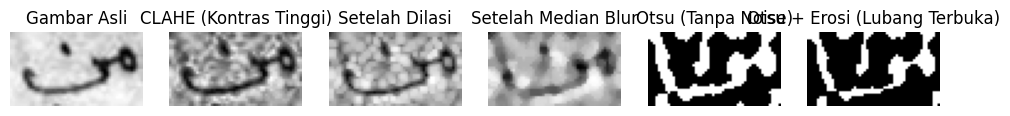

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))  # Naikkan clipLimit
image_clahe = clahe.apply(image)

# === 3. Dilasi Sebelum Thresholding ===
kernel_dilasi = np.ones((2, 2), np.uint8)
image_dilated = cv2.dilate(image_clahe, kernel_dilasi, iterations=1)

# === 4. Kurangi Noise dengan Median Blur ===
kernel_size = 5
image_median = cv2.medianBlur(image_dilated, kernel_size)

# === 5. Otsu Thresholding ===
_, otsu = cv2.threshold(image_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_inv = cv2.bitwise_not(otsu)  # Inversi agar huruf putih

# === 6. Erosi Setelah Otsu ===
kernel_erosi = np.ones((2, 2), np.uint8)
otsu_eroded = cv2.erode(otsu_inv, kernel_erosi, iterations=1)

# === 7. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 6, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 6, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 6, 3)
plt.imshow(image_dilated, cmap="gray")
plt.title("Setelah Dilasi")
plt.axis("off")

plt.subplot(1, 6, 4)
plt.imshow(image_median, cmap="gray")
plt.title("Setelah Median Blur")
plt.axis("off")

plt.subplot(1, 6, 5)
plt.imshow(otsu_inv, cmap="gray")
plt.title("Otsu (Tanpa Noise)")
plt.axis("off")

plt.subplot(1, 6, 6)
plt.imshow(otsu_eroded, cmap="gray")
plt.title("Otsu + Erosi (Lubang Terbuka)")
plt.axis("off")

plt.show()


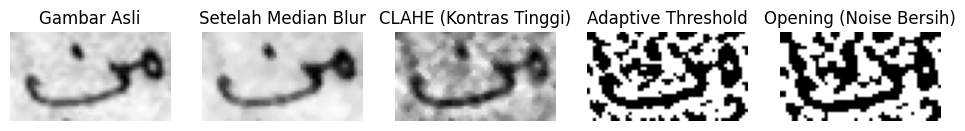

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Kurangi Noise dengan Median Blur ===
image_blur = cv2.medianBlur(image, 3)  # Filter noise sebelum CLAHE

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Adaptive Thresholding ===
adaptive_thresh = cv2.adaptiveThreshold(
    image_clahe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# === 5. Morphological Opening untuk Membersihkan Noise ===
kernel = np.ones((2, 2), np.uint8)
image_opening = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel)

# === 6. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_blur, cmap="gray")
plt.title("Setelah Median Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Threshold")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(image_opening, cmap="gray")
plt.title("Opening (Noise Bersih)")
plt.axis("off")

plt.show()


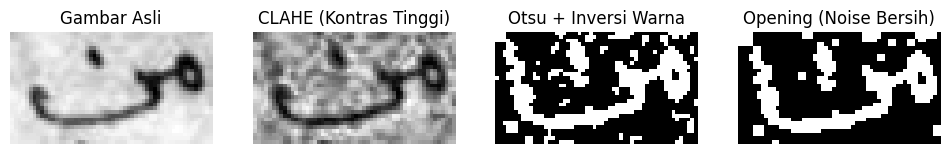

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"  # Ganti dengan nama file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# === 3. Otsu Thresholding ===
_, otsu_thresh = cv2.threshold(image_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 4. Inversi Warna (Agar Huruf Putih) ===
image_inverted = cv2.bitwise_not(otsu_thresh)

# === 5. Morphological Opening untuk Bersihkan Noise Kecil ===
kernel = np.ones((2, 2), np.uint8)
image_clean = cv2.morphologyEx(image_inverted, cv2.MORPH_OPEN, kernel)

# === 6. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(image_inverted, cmap="gray")
plt.title("Otsu + Inversi Warna")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(image_clean, cmap="gray")
plt.title("Opening (Noise Bersih)")
plt.axis("off")

plt.show()


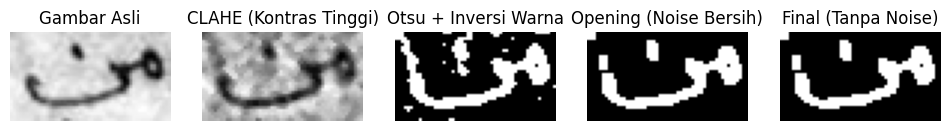

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Median Blur untuk Mengurangi Noise Sebelum Thresholding ===
image_blur = cv2.medianBlur(image, 3)  # Bisa coba 3 atau 5

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Otsu Thresholding ===
_, otsu_thresh = cv2.threshold(image_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 5. Inversi Warna (Agar Huruf Putih) ===
image_inverted = cv2.bitwise_not(otsu_thresh)

# === 6. Morphological Opening untuk Bersihkan Noise Kecil ===
kernel = np.ones((3, 3), np.uint8)  # Bisa coba (4,4) jika masih ada noise
image_clean = cv2.morphologyEx(image_inverted, cv2.MORPH_OPEN, kernel)

# === 7. Hapus Komponen Kecil (Noise) ===
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image_clean, connectivity=8)
min_size = 5  # Ubah sesuai kebutuhan

final_image = np.zeros_like(image_clean)
for i in range(1, num_labels):  # Skip background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        final_image[labels == i] = 255

# === 8. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_inverted, cmap="gray")
plt.title("Otsu + Inversi Warna")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_clean, cmap="gray")
plt.title("Opening (Noise Bersih)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(final_image, cmap="gray")
plt.title("Final (Tanpa Noise)")
plt.axis("off")

plt.show()


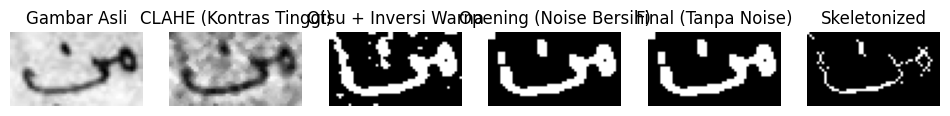

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Median Blur untuk Mengurangi Noise Sebelum Thresholding ===
image_blur = cv2.medianBlur(image, 3)

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Otsu Thresholding ===
_, otsu_thresh = cv2.threshold(image_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 5. Inversi Warna (Agar Huruf Putih) ===
image_inverted = cv2.bitwise_not(otsu_thresh)

# === 6. Morphological Opening untuk Menghilangkan Noise Kecil ===
kernel = np.ones((3, 3), np.uint8)
image_clean = cv2.morphologyEx(image_inverted, cv2.MORPH_OPEN, kernel)

# === 7. Hapus Komponen Kecil (Noise) ===
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image_clean, connectivity=8)
min_size = 5  # Ubah sesuai kebutuhan

final_image = np.zeros_like(image_clean)
for i in range(1, num_labels):  # Skip background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        final_image[labels == i] = 255

# === 8. Skeletonization (Thinning) ===
skeleton = np.zeros_like(final_image)
temp = final_image.copy()

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)

while True:
    eroded = cv2.erode(temp, kernel)
    temp_open = cv2.dilate(eroded, kernel)
    temp_skel = cv2.subtract(temp, temp_open)
    skeleton = cv2.bitwise_or(skeleton, temp_skel)
    temp = eroded.copy()

    if cv2.countNonZero(temp) == 0:
        break

# === 9. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 6, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 6, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 6, 3)
plt.imshow(image_inverted, cmap="gray")
plt.title("Otsu + Inversi Warna")
plt.axis("off")

plt.subplot(1, 6, 4)
plt.imshow(image_clean, cmap="gray")
plt.title("Opening (Noise Bersih)")
plt.axis("off")

plt.subplot(1, 6, 5)
plt.imshow(final_image, cmap="gray")
plt.title("Final (Tanpa Noise)")
plt.axis("off")

plt.subplot(1, 6, 6)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeletonized")
plt.axis("off")

plt.show()


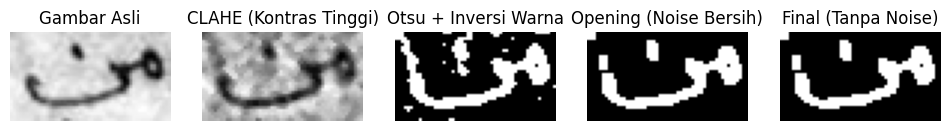

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Median Blur untuk Mengurangi Noise Sebelum Thresholding ===
image_blur = cv2.medianBlur(image, 3)  # Bisa coba 3 atau 5

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Otsu Thresholding ===
_, otsu_thresh = cv2.threshold(image_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 5. Inversi Warna (Agar Huruf Putih) ===
image_inverted = cv2.bitwise_not(otsu_thresh)

# === 6. Morphological Opening untuk Bersihkan Noise Kecil ===
kernel = np.ones((3, 3), np.uint8)  # Bisa coba (4,4) jika masih ada noise
image_clean = cv2.morphologyEx(image_inverted, cv2.MORPH_OPEN, kernel)

# === 7. Hapus Komponen Kecil (Noise) ===
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image_clean, connectivity=8)
min_size = 5  # Ubah sesuai kebutuhan

final_image = np.zeros_like(image_clean)
for i in range(1, num_labels):  # Skip background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        final_image[labels == i] = 255

# === 8. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_inverted, cmap="gray")
plt.title("Otsu + Inversi Warna")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_clean, cmap="gray")
plt.title("Opening (Noise Bersih)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(final_image, cmap="gray")
plt.title("Final (Tanpa Noise)")
plt.axis("off")

plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# === 1. Gunakan Gambar Final dari Proses Sebelumnya ===
final_image = final_image  # Langsung pakai hasil sebelumnya

# === 2. Pastikan Biner (0 dan 255), Jika Belum Bisa Pakai Threshold ===
_, binary_image = cv2.threshold(final_image, 120, 255, cv2.THRESH_BINARY)

# === 3. Konversi ke Format 0 dan 1 untuk Skeletonization ===
binary_image = binary_image // 255  # Konversi dari 255 ke 1 (Biner)

# === 4. Skeletonization Menggunakan skimage ===
skeleton = skeletonize(binary_image)  # Hasilnya dalam format 0-1

# === 5. Konversi Kembali ke 0-255 untuk Ditampilkan ===
skeleton = (skeleton * 255).astype(np.uint8)

# === 6. Tampilkan Hasil ===
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.imshow(final_image, cmap="gray")
plt.title("Final (Tanpa Noise)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeletonized")
plt.axis("off")

plt.show()


NameError: name 'final_image' is not defined

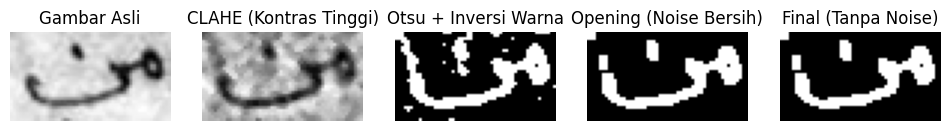

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca Gambar dalam Grayscale ===
image_path = "percobaan.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# === 2. Median Blur untuk Mengurangi Noise Sebelum Thresholding ===
image_blur = cv2.medianBlur(image, 3)  # Bisa coba 3 atau 5

# === 3. Tingkatkan Kontras dengan CLAHE ===
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blur)

# === 4. Otsu Thresholding ===
_, otsu_thresh = cv2.threshold(image_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 5. Inversi Warna (Agar Huruf Putih) ===
image_inverted = cv2.bitwise_not(otsu_thresh)

# === 6. Morphological Opening untuk Bersihkan Noise Kecil ===
kernel = np.ones((3, 3), np.uint8)  # Bisa coba (4,4) jika masih ada noise
image_clean = cv2.morphologyEx(image_inverted, cv2.MORPH_OPEN, kernel)

# === 7. Hapus Komponen Kecil (Noise) ===
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image_clean, connectivity=8)
min_size = 5  # Ubah sesuai kebutuhan

final_image = np.zeros_like(image_clean)
for i in range(1, num_labels):  # Skip background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        final_image[labels == i] = 255

# === 8. Tampilkan hasil ===
plt.figure(figsize=(12, 3))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_clahe, cmap="gray")
plt.title("CLAHE (Kontras Tinggi)")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(image_inverted, cmap="gray")
plt.title("Otsu + Inversi Warna")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_clean, cmap="gray")
plt.title("Opening (Noise Bersih)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(final_image, cmap="gray")
plt.title("Final (Tanpa Noise)")
plt.axis("off")

plt.show()



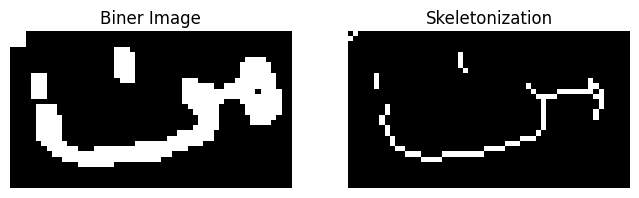

True

In [ ]:
# === 9. Konversi ke Biner Secara Eksplisit ===
_, binary_image = cv2.threshold(final_image, 127, 255, cv2.THRESH_BINARY)

# === 10. Skeletonization dengan Morphological Thinning ===
from skimage.morphology import skeletonize

skeleton = skeletonize(binary_image // 255)  # Convert ke 0 dan 1 sebelum skeletonization
skeleton = (skeleton * 255).astype(np.uint8)  # Balikin ke 0-255 untuk tampilan

# === 11. Tampilkan Hasil Binary & Skeletonization ===
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap="gray")
plt.title("Biner Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeletonization")
plt.axis("off")

plt.show()

# === 12. Simpan hasil binary dan skeleton ===
cv2.imwrite("binary_image.png", binary_image)
cv2.imwrite("skeleton_image.png", skeleton)


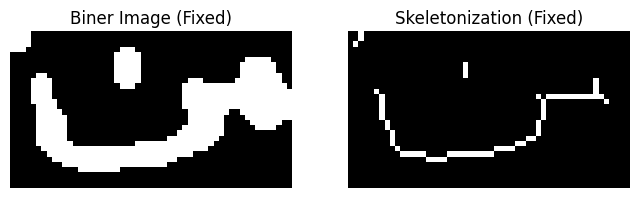

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# === 1. CLAHE untuk Meningkatkan Kontras ===
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_image = clahe.apply(final_image)

# === 2. Median Blur buat Ngilangin Noise Tanpa Merusak Huruf ===
blurred = cv2.medianBlur(enhanced_image, 3)

# === 3. Thresholding Otsu biar Thresholdnya Optimal ===
_, binary_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 4. Dilasi Dikit Biar Huruf Lebih Stabil ===
kernel = np.ones((2,2), np.uint8)  # Kernel kecil biar ga terlalu gede
binary_dilated = cv2.dilate(binary_image, kernel, iterations=1)

# === 5. Skeletonization ===
skeleton = skeletonize(binary_dilated // 255)
skeleton = (skeleton * 255).astype(np.uint8)

# === 6. Tampilkan Hasil ===
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.imshow(binary_dilated, cmap="gray")
plt.title("Biner Image (Fixed)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeletonization (Fixed)")
plt.axis("off")

plt.show()


Saving percobaan.png to percobaan (6).png


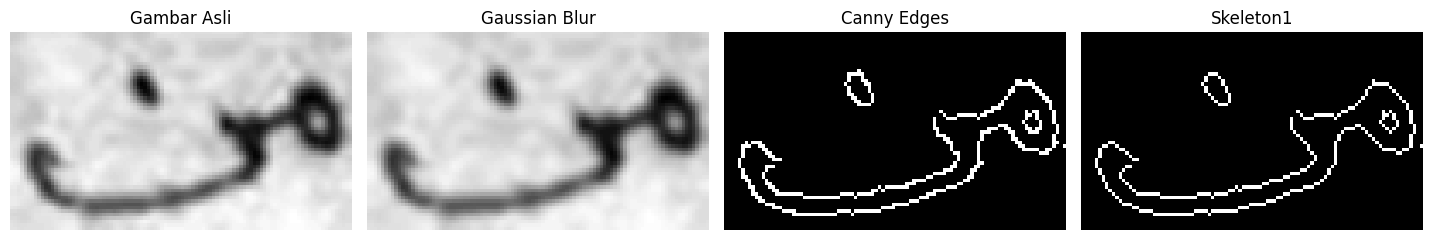

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "percobaan.png"  # Sesuaikan dengan path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Preprocessing ===
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# === 4. Canny Edge Detection ===
edges = cv2.Canny(blurred, threshold1=50, threshold2=10)

# === 5. Konversi ke Biner ===
_, binary = cv2.threshold(edges, 128, 255, cv2.THRESH_BINARY)

# === 6. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)


# === 8. Tampilkan Hasil ===
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton1")
plt.axis("off")

plt.tight_layout()
plt.show()


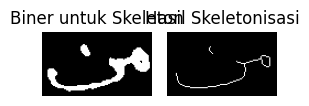

In [ ]:
# === 5. Konversi ke Biner LANGSUNG dari blurred image
_, binary_for_skeleton = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)

# === 6. Skeletonization dari citra biner asli (bukan dari edge)
skeleton = skeletonize(binary_for_skeleton > 0)
skeleton = (skeleton * 255).astype(np.uint8)

plt.subplot(1, 5, 4)
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi")
plt.axis("off")

plt.tight_layout()
plt.show()

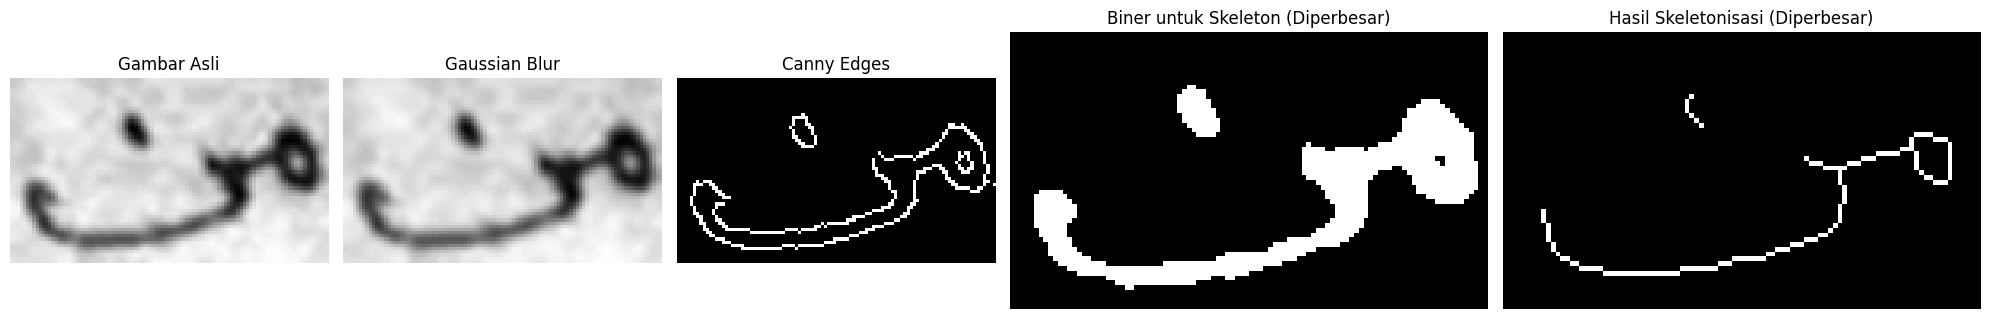

In [ ]:
# ===== PERBAIKAN DISINI =====
# 1. Perbesar ukuran figure (width, height)
plt.figure(figsize=(20, 6))  # Sebelumnya (18,5)

# 2. Atur lebar relatif subplot (beri lebih banyak ruang untuk gambar 4 & 5)
width_ratios = [1, 1, 1, 1.5, 1.5]  # Subplot 4 & 5 lebih lebar
gs = plt.GridSpec(1, 5, width_ratios=width_ratios)

# Subplot 1-3 (gambar asli, blur, canny)
plt.subplot(gs[0])
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(gs[1])
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(gs[2])
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

# Subplot 4 & 5 (biner & skeleton - diperbesar)
plt.subplot(gs[3])  # Lebar 1.5x dari subplot biasa
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton (Diperbesar)")
plt.axis("off")

plt.subplot(gs[4])  # Lebar 1.5x dari subplot biasa
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi (Diperbesar)")
plt.axis("off")

plt.tight_layout()
plt.show()

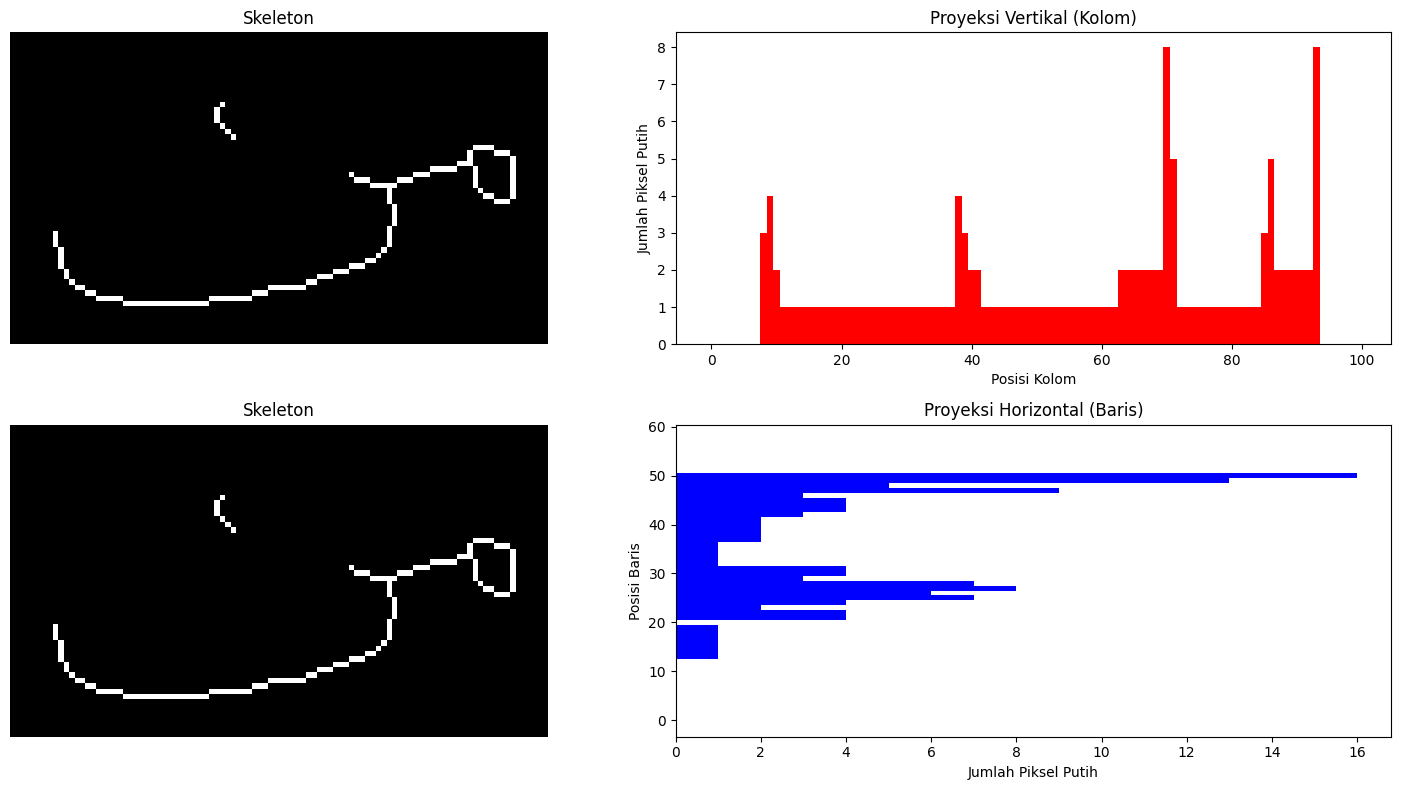

In [ ]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")

plt.tight_layout()
plt.show()

Saving contoh.png to contoh (14).png


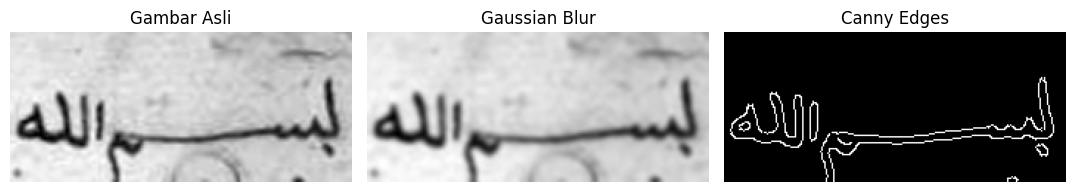

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "contoh.png"  # Sesuaikan dengan path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Preprocessing ===
blurred = cv2.GaussianBlur(image, (7, 7), 0)

# === 4. Canny Edge Detection ===
edges = cv2.Canny(blurred, threshold1=130, threshold2=100)


# === 8. Tampilkan Hasil ===
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.tight_layout()
plt.show()


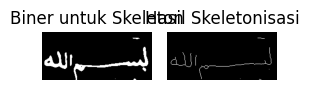

In [ ]:
# === 5. Konversi ke Biner LANGSUNG dari blurred image
_, binary_for_skeleton = cv2.threshold(blurred, 109, 255, cv2.THRESH_BINARY_INV)

# === 6. Skeletonization dari citra biner asli (bukan dari edge)
skeleton = skeletonize(binary_for_skeleton > 0)
skeleton = (skeleton * 255).astype(np.uint8)

plt.subplot(1, 5, 4)
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi")
plt.axis("off")

plt.tight_layout()
plt.show()

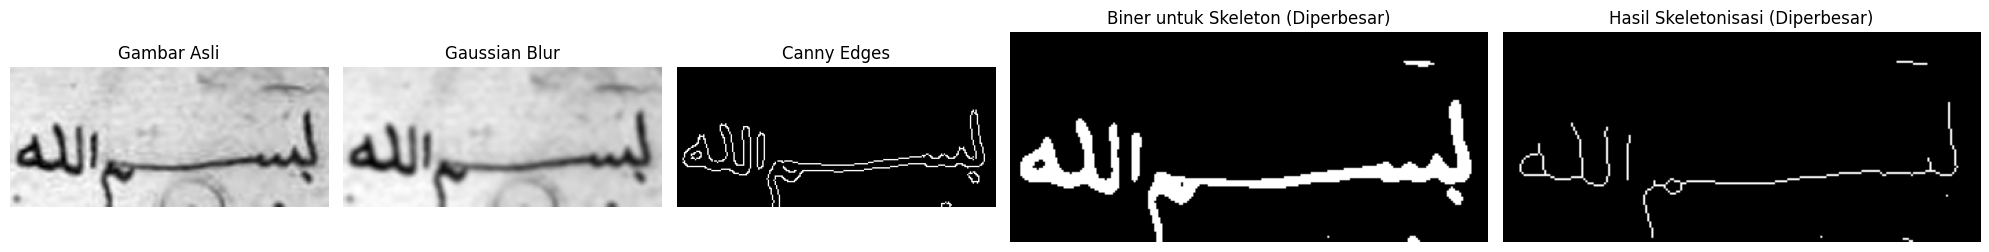

In [ ]:
# ===== PERBAIKAN DISINI =====
# 1. Perbesar ukuran figure (width, height)
plt.figure(figsize=(20, 6))  # Sebelumnya (18,5)

# 2. Atur lebar relatif subplot (beri lebih banyak ruang untuk gambar 4 & 5)
width_ratios = [1, 1, 1, 1.5, 1.5]  # Subplot 4 & 5 lebih lebar
gs = plt.GridSpec(1, 5, width_ratios=width_ratios)

# Subplot 1-3 (gambar asli, blur, canny)
plt.subplot(gs[0])
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(gs[1])
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(gs[2])
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

# Subplot 4 & 5 (biner & skeleton - diperbesar)
plt.subplot(gs[3])  # Lebar 1.5x dari subplot biasa
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton (Diperbesar)")
plt.axis("off")

plt.subplot(gs[4])  # Lebar 1.5x dari subplot biasa
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi (Diperbesar)")
plt.axis("off")

plt.tight_layout()
plt.show()

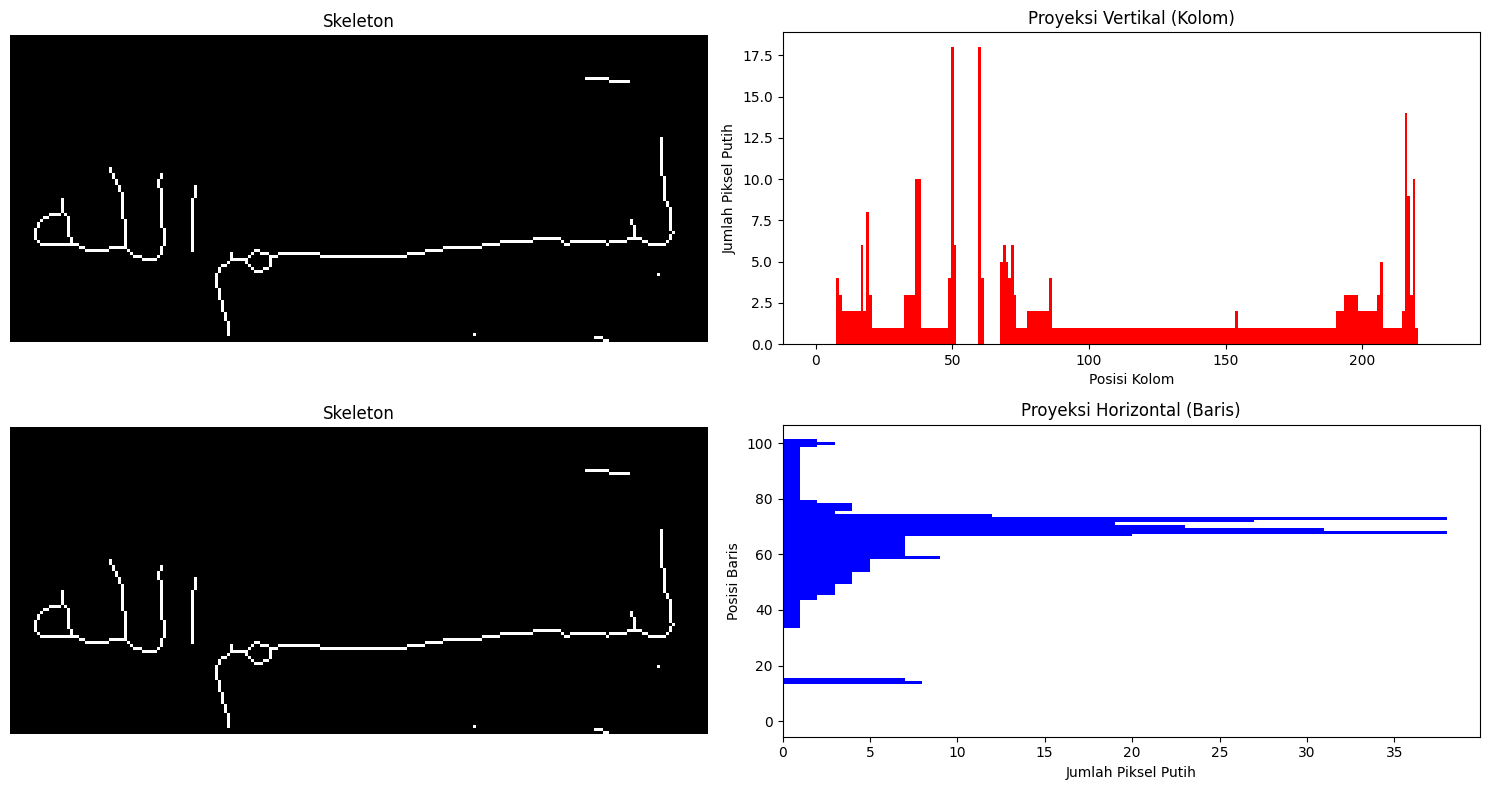

In [ ]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")

plt.tight_layout()
plt.show()